# Part 1: Imports the Data of Alme et al. and pre-processes it by:
        -behavioral data analysis (Speed, acceleration...)
        -calculating the spiking frequency of each cell in each bin in each session
        -applying speed-filtering of position and spiking data
        -thresholding the data. We treat cell with at least 11 spikes in a session as "active"
        -applying a gaussian filter to the spiking data
        -OUTPUTS 4   dictionaries: 1. rate maps 
                                   2. behavioral data 
                                   3. maxfr_freq
                                   4. above_thres


In [1]:
############### PART 1 ###################

# IMPORTING MODULES 
#import ruamel.yaml
from pynwb import TimeSeries
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile
import numpy as np
from pynwb import NWBHDF5IO
import h5py
from pynwb import h5py
import pynwb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
import math
from scipy import stats
import scipy.signal
from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import gaussian_filter1d
import os, sys
import scipy
from scipy.stats.stats import pearsonr
#import importnb
import pickle 
import statsmodels.api as sm

#from outliers import smirnov_grubbs as grubbs
#import outliers

#Importing all the external functions that are saved in another ipynb. IMPORTANT: Alme_functions must be .ipynb
import nbimporter
from Animal_to_animal_functions import *

# Definings a project and data directory
proj_dir = './Data/'   #project directory 
data_dir = os.listdir(proj_dir)
data_dir = sorted(data_dir)

# Excecuting the data analysis 

0
17894_fam_begin1_0_b'T03C01'
1
17894_fam_begin1_1_b'T03C02'
10
17894_fam_begin1_10_b'T04C07'
11
17894_fam_begin1_11_b'T04C08'
12
17894_fam_begin1_12_b'T04C09'
13
17894_fam_begin1_13_b'T04C10'
14
17894_fam_begin1_14_b'T04C11'
15
17894_fam_begin1_15_b'T05C01'
16
17894_fam_begin1_16_b'T05C02'
17
17894_fam_begin1_17_b'T05C03'
18
17894_fam_begin1_18_b'T05C04'
19
17894_fam_begin1_19_b'T05C05'
2
17894_fam_begin1_2_b'T03C03'
20
17894_fam_begin1_20_b'T05C06'
21
17894_fam_begin1_21_b'T05C07'
22
17894_fam_begin1_22_b'T05C08'
23
17894_fam_begin1_23_b'T05C09'


<ipython-input-2-1c49584352e9>:358: RuntimeWarning: invalid value encountered in true_divide
  freq_in_bin = spike_count/time_in_bin         #calculate the spike frequency in each bin


24
17894_fam_begin1_24_b'T05C10'
25
17894_fam_begin1_25_b'T05C11'
26
17894_fam_begin1_26_b'T05C12'
27
17894_fam_begin1_27_b'T05C13'
28
17894_fam_begin1_28_b'T05C14'
29
17894_fam_begin1_29_b'T05C15'
3
17894_fam_begin1_3_b'T03C04'
30
17894_fam_begin1_30_b'T06C01'
31
17894_fam_begin1_31_b'T06C02'
32
17894_fam_begin1_32_b'T06C03'
33
17894_fam_begin1_33_b'T06C04'
34
17894_fam_begin1_34_b'T06C05'
35
17894_fam_begin1_35_b'T06C06'
36
17894_fam_begin1_36_b'T06C07'
37
17894_fam_begin1_37_b'T06C08'
38
17894_fam_begin1_38_b'T07C01'
39
17894_fam_begin1_39_b'T07C02'
4
17894_fam_begin1_4_b'T04C01'
40
17894_fam_begin1_40_b'T07C03'
41
17894_fam_begin1_41_b'T07C04'
42
17894_fam_begin1_42_b'T07C05'
43
17894_fam_begin1_43_b'T07C06'
44
17894_fam_begin1_44_b'T07C07'
45
17894_fam_begin1_45_b'T07C08'
46
17894_fam_begin1_46_b'T07C09'
47
17894_fam_begin1_47_b'T07C10'
48
17894_fam_begin1_48_b'T09C01'
49
17894_fam_begin1_49_b'T09C02'
5
17894_fam_begin1_5_b'T04C02'
50
17894_fam_begin1_50_b'T09C03'
51
17894_fam_beg

25
17894_novel10_begin1_25_b'T05C11'
26
17894_novel10_begin1_26_b'T05C12'
27
17894_novel10_begin1_27_b'T05C13'
28
17894_novel10_begin1_28_b'T05C14'
29
17894_novel10_begin1_29_b'T05C15'
3
17894_novel10_begin1_3_b'T03C04'
30
17894_novel10_begin1_30_b'T06C01'
31
17894_novel10_begin1_31_b'T06C02'
32
17894_novel10_begin1_32_b'T06C03'
33
17894_novel10_begin1_33_b'T06C04'
34
17894_novel10_begin1_34_b'T06C05'
35
17894_novel10_begin1_35_b'T06C06'
36
17894_novel10_begin1_36_b'T06C07'
37
17894_novel10_begin1_37_b'T06C08'
38
17894_novel10_begin1_38_b'T07C01'
39
17894_novel10_begin1_39_b'T07C02'
4
17894_novel10_begin1_4_b'T04C01'
40
17894_novel10_begin1_40_b'T07C03'
41
17894_novel10_begin1_41_b'T07C04'
42
17894_novel10_begin1_42_b'T07C05'
43
17894_novel10_begin1_43_b'T07C06'
44
17894_novel10_begin1_44_b'T07C07'
45
17894_novel10_begin1_45_b'T07C08'
46
17894_novel10_begin1_46_b'T07C09'
47
17894_novel10_begin1_47_b'T07C10'
48
17894_novel10_begin1_48_b'T09C01'
49
17894_novel10_begin1_49_b'T09C02'
5
178

17894_novel1_begin2_7_b'T04C04'
8
17894_novel1_begin2_8_b'T04C05'
9
17894_novel1_begin2_9_b'T04C06'
0
17894_novel1_begin3_0_b'T03C01'
1
17894_novel1_begin3_1_b'T03C02'
10
17894_novel1_begin3_10_b'T04C07'
11
17894_novel1_begin3_11_b'T04C08'
12
17894_novel1_begin3_12_b'T04C09'
13
17894_novel1_begin3_13_b'T04C10'
14
17894_novel1_begin3_14_b'T04C11'
15
17894_novel1_begin3_15_b'T05C01'
16
17894_novel1_begin3_16_b'T05C02'
17
17894_novel1_begin3_17_b'T05C03'
18
17894_novel1_begin3_18_b'T05C04'
19
17894_novel1_begin3_19_b'T05C05'
2
17894_novel1_begin3_2_b'T03C03'
20
17894_novel1_begin3_20_b'T05C06'
21
17894_novel1_begin3_21_b'T05C07'
22
17894_novel1_begin3_22_b'T05C08'
23
17894_novel1_begin3_23_b'T05C09'
24
17894_novel1_begin3_24_b'T05C10'
25
17894_novel1_begin3_25_b'T05C11'
26
17894_novel1_begin3_26_b'T05C12'
27
17894_novel1_begin3_27_b'T05C13'
28
17894_novel1_begin3_28_b'T05C14'
29
17894_novel1_begin3_29_b'T05C15'
3
17894_novel1_begin3_3_b'T03C04'
30
17894_novel1_begin3_30_b'T06C01'
31
17894

17894_novel2_begin2_39_b'T07C02'
4
17894_novel2_begin2_4_b'T04C01'
40
17894_novel2_begin2_40_b'T07C03'
41
17894_novel2_begin2_41_b'T07C04'
42
17894_novel2_begin2_42_b'T07C05'
43
17894_novel2_begin2_43_b'T07C06'
44
17894_novel2_begin2_44_b'T07C07'
45
17894_novel2_begin2_45_b'T07C08'
46
17894_novel2_begin2_46_b'T07C09'
47
17894_novel2_begin2_47_b'T07C10'
48
17894_novel2_begin2_48_b'T09C01'
49
17894_novel2_begin2_49_b'T09C02'
5
17894_novel2_begin2_5_b'T04C02'
50
17894_novel2_begin2_50_b'T09C03'
51
17894_novel2_begin2_51_b'T09C04'
52
17894_novel2_begin2_52_b'T09C05'
53
17894_novel2_begin2_53_b'T09C06'
54
17894_novel2_begin2_54_b'T09C07'
55
17894_novel2_begin2_55_b'T09C08'
56
17894_novel2_begin2_56_b'T09C09'
57
17894_novel2_begin2_57_b'T09C10'
58
17894_novel2_begin2_58_b'T09C11'
59
17894_novel2_begin2_59_b'T09C12'
6
17894_novel2_begin2_6_b'T04C03'
60
17894_novel2_begin2_60_b'T10C01'
61
17894_novel2_begin2_61_b'T10C02'
62
17894_novel2_begin2_62_b'T10C03'
63
17894_novel2_begin2_63_b'T10C04'
6

0
17894_novel4_begin2_0_b'T03C01'
1
17894_novel4_begin2_1_b'T03C02'
10
17894_novel4_begin2_10_b'T04C07'
11
17894_novel4_begin2_11_b'T04C08'
12
17894_novel4_begin2_12_b'T04C09'
13
17894_novel4_begin2_13_b'T04C10'
14
17894_novel4_begin2_14_b'T04C11'
15
17894_novel4_begin2_15_b'T05C01'
16
17894_novel4_begin2_16_b'T05C02'
17
17894_novel4_begin2_17_b'T05C03'
18
17894_novel4_begin2_18_b'T05C04'
19
17894_novel4_begin2_19_b'T05C05'
2
17894_novel4_begin2_2_b'T03C03'
20
17894_novel4_begin2_20_b'T05C06'
21
17894_novel4_begin2_21_b'T05C07'
22
17894_novel4_begin2_22_b'T05C08'
23
17894_novel4_begin2_23_b'T05C09'
24
17894_novel4_begin2_24_b'T05C10'
25
17894_novel4_begin2_25_b'T05C11'
26
17894_novel4_begin2_26_b'T05C12'
27
17894_novel4_begin2_27_b'T05C13'
28
17894_novel4_begin2_28_b'T05C14'
29
17894_novel4_begin2_29_b'T05C15'
3
17894_novel4_begin2_3_b'T03C04'
30
17894_novel4_begin2_30_b'T06C01'
31
17894_novel4_begin2_31_b'T06C02'
32
17894_novel4_begin2_32_b'T06C03'
33
17894_novel4_begin2_33_b'T06C04'


17894_novel6_begin1_50_b'T09C03'
51
17894_novel6_begin1_51_b'T09C04'
52
17894_novel6_begin1_52_b'T09C05'
53
17894_novel6_begin1_53_b'T09C06'
54
17894_novel6_begin1_54_b'T09C07'
55
17894_novel6_begin1_55_b'T09C08'
56
17894_novel6_begin1_56_b'T09C09'
57
17894_novel6_begin1_57_b'T09C10'
58
17894_novel6_begin1_58_b'T09C11'
59
17894_novel6_begin1_59_b'T09C12'
6
17894_novel6_begin1_6_b'T04C03'
60
17894_novel6_begin1_60_b'T10C01'
61
17894_novel6_begin1_61_b'T10C02'
62
17894_novel6_begin1_62_b'T10C03'
63
17894_novel6_begin1_63_b'T10C04'
64
17894_novel6_begin1_64_b'T10C05'
65
17894_novel6_begin1_65_b'T10C06'
7
17894_novel6_begin1_7_b'T04C04'
8
17894_novel6_begin1_8_b'T04C05'
9
17894_novel6_begin1_9_b'T04C06'
0
17894_novel6_begin2_0_b'T03C01'
1
17894_novel6_begin2_1_b'T03C02'
10
17894_novel6_begin2_10_b'T04C07'
11
17894_novel6_begin2_11_b'T04C08'
12
17894_novel6_begin2_12_b'T04C09'
13
17894_novel6_begin2_13_b'T04C10'
14
17894_novel6_begin2_14_b'T04C11'
15
17894_novel6_begin2_15_b'T05C01'
16
1789

17894_novel7_begin1_3_b'T03C04'
30
17894_novel7_begin1_30_b'T06C01'
31
17894_novel7_begin1_31_b'T06C02'
32
17894_novel7_begin1_32_b'T06C03'
33
17894_novel7_begin1_33_b'T06C04'
34
17894_novel7_begin1_34_b'T06C05'
35
17894_novel7_begin1_35_b'T06C06'
36
17894_novel7_begin1_36_b'T06C07'
37
17894_novel7_begin1_37_b'T06C08'
38
17894_novel7_begin1_38_b'T07C01'
39
17894_novel7_begin1_39_b'T07C02'
4
17894_novel7_begin1_4_b'T04C01'
40
17894_novel7_begin1_40_b'T07C03'
41
17894_novel7_begin1_41_b'T07C04'
42
17894_novel7_begin1_42_b'T07C05'
43
17894_novel7_begin1_43_b'T07C06'
44
17894_novel7_begin1_44_b'T07C07'
45
17894_novel7_begin1_45_b'T07C08'
46
17894_novel7_begin1_46_b'T07C09'
47
17894_novel7_begin1_47_b'T07C10'
48
17894_novel7_begin1_48_b'T09C01'
49
17894_novel7_begin1_49_b'T09C02'
5
17894_novel7_begin1_5_b'T04C02'
50
17894_novel7_begin1_50_b'T09C03'
51
17894_novel7_begin1_51_b'T09C04'
52
17894_novel7_begin1_52_b'T09C05'
53
17894_novel7_begin1_53_b'T09C06'
54
17894_novel7_begin1_54_b'T09C07'


0
17894_novel9_begin1_0_b'T03C01'
1
17894_novel9_begin1_1_b'T03C02'
10
17894_novel9_begin1_10_b'T04C07'
11
17894_novel9_begin1_11_b'T04C08'
12
17894_novel9_begin1_12_b'T04C09'
13
17894_novel9_begin1_13_b'T04C10'
14
17894_novel9_begin1_14_b'T04C11'
15
17894_novel9_begin1_15_b'T05C01'
16
17894_novel9_begin1_16_b'T05C02'
17
17894_novel9_begin1_17_b'T05C03'
18
17894_novel9_begin1_18_b'T05C04'
19
17894_novel9_begin1_19_b'T05C05'
2
17894_novel9_begin1_2_b'T03C03'
20
17894_novel9_begin1_20_b'T05C06'
21
17894_novel9_begin1_21_b'T05C07'
22
17894_novel9_begin1_22_b'T05C08'
23
17894_novel9_begin1_23_b'T05C09'
24
17894_novel9_begin1_24_b'T05C10'
25
17894_novel9_begin1_25_b'T05C11'
26
17894_novel9_begin1_26_b'T05C12'
27
17894_novel9_begin1_27_b'T05C13'
28
17894_novel9_begin1_28_b'T05C14'
29
17894_novel9_begin1_29_b'T05C15'
3
17894_novel9_begin1_3_b'T03C04'
30
17894_novel9_begin1_30_b'T06C01'
31
17894_novel9_begin1_31_b'T06C02'
32
17894_novel9_begin1_32_b'T06C03'
33
17894_novel9_begin1_33_b'T06C04'


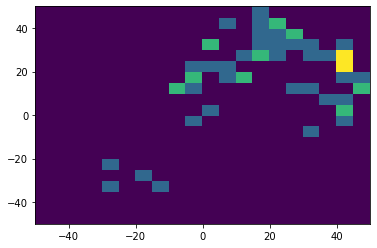

In [2]:
################################## A) Defining output dictionaries  ###########################################  



rate_maps       = {}                 #--------> Data for place fields
                                     #key: animal_room_session_cell_tetrode, value: rate_map binned

behavioral_data = {}                 #--------> Data of animals behavior for each session and room 
                                     # In each dict keys are the animal_room_session and the values are 
                                     # place fields/spiking data for image_dict and image dict_raw 
                                     # for behavioral_data I will show a direct example to make the structure clear 
                                     # "17490_novel4_begin1":[[head_dir],[res_ves],[res_vec_deg], [res_vec_len],
                                     #                       [ang_vel], [mean_ang_vel], [mean_abs_ang_vel],
                                     #                       [speed],[mean_speed],[var_speed],
                                     #                       [accel],[mean_accel],[var_accel]]
                                  
                            
maxfr_freq      = {}                #--------> data for number of spikes vs. spiking frequency. Dict of Dict
                                    #key1: room_session, key2: cell, value: [num_spikes, spiking_freq]

above_thres     = {}                #--------> data describing if the cell was silent, below threshold, or active 
                                    #in a given room and session 
                                    #key1: room_session, key2: cell, value: 0 or True or False 
        
##############################################################################################################


#For loop over each data file. One data file is the data of one animal in one session                    LOOP #1
#The code can be run either for an individual animal or for an individual session of an animal 




for data in data_dir:
    if data[0:5] =='17894':                #--> this line imoorts the data of each session of that animal consecutively
    #if data[0:18] =='17894_novel3begin2': #-->change the ID for animal [17894,17769,18024,18237,19251]
    #if data[0:15] =='17769_fambegin4':
        
#################################  B) Defining useful paths of the data file that was importet ######################
        
        animal = data[0:5]                                          #name of animal
        room = data[6:-9]                                           #name of room 
        session = data[-9:-3]                                       #name of session 
        io = h5py.File(proj_dir+data, 'r')                          #importing the data of animal_in_room_in_session
        acquisition = io['acquisition']
        acquisition_timeseries = acquisition['timeseries']          #the timeseries 
        led1 =  acquisition_timeseries[room + session +'-LED1']     
        led2 = acquisition_timeseries[room + session +'-LED2']      
        data1 = led1['data']                                        #data from LED 1
        data2 = led2['data']                                        #data from LED 2
        processing = io['processing']
        position = io['processing']['matlab_scripts']['Position']
        position_data = position['body']['data']                    #position data of that session 
        timestamps = io['processing']['matlab_scripts']['Position']['body']['timestamps']   #timestamps of recording
        unit_times = processing['matlab_scripts']['UnitTimes']                              #list of recorded cells
    
#####################################################################################################################    
       
#########################  C) Getting the spike times for each place cell and saving it in a dictionary##############
        #Keys of the dictionary are the cell number. Values are spike times of that cell in seconds. 
        #Calling spike_times['6'] gives a dataset of all the spike-times of cell number 7.

        spike_times = {} 
        
        for cell in unit_times.keys():                                            #get the spike times of each neuron. 
            if cell != 'unit_list': spike_times[cell] = unit_times[cell]['times'] #ignore the unit list in the same directory 
        
######################################################################################################################        
  
    
###########   D) Creating a speed over time table (and graph), which will be used for speed filtering later on.#######
              #position_data = x and y coordinates of animals position 
              #timestamps = progression of time in real seconds 
              #BEHAVIORAL DATA IS ALL COMPUTED HERE 
        
        
        #Position and Speed 
        position_data = np.array(position['body']['data'])                #convert position data to array
                                                                          #The position data is ALREADY SMOOTHENED AND INTERPOLATED
                                                                          #position data frormat = [[x1,y1],[x2,y2]...]
        
        x_unf = position_data[:,0]                                            #x positions as they give it to us
        y_unf = position_data[:,1]                                            #y positions as they give it to us 
        
        use_filtered_position = True
        if use_filtered_position:
            x = gaussian_filter1d(x_unf, sigma=5)        #x positions smoothened because it was still noisy  
            y = gaussian_filter1d(y_unf, sigma=5)        #y positions smoothened because it was still noisy
        

        delta_x    = np.diff(x)                                         #delta x distance 
        delta_y    = np.diff(y)                                         #delta y distance 
        timestamps = np.array(timestamps)                               #convert timestamps to array
        time_diff = np.diff(timestamps, axis=0)                         #calc. change in time as t2-t1, delta t
        time_diff = np.reshape(time_diff,(1,len(time_diff))) #convert the shape of the vector for the following division to work 
        x_speed = delta_x/time_diff                                     #speed in x direction 
        y_speed = delta_y/time_diff                                     #speed in y direction 
        
        x_speed = gaussian_filter1d(x_speed, sigma=7)
        y_speed = gaussian_filter1d(y_speed, sigma=7)

        speed = np.sqrt(x_speed**2 + y_speed**2)                             #calc. total speed 
        mean_speed = np.mean(speed)                                          #mean speed of session 
        var_speed = np.var(speed)                                            #variance of speed of session 
        
        
        
        #Resultant Vector 
        delta_x_sum = np.sum(delta_x)                                        #Sum of displacemet in x-direction               
        delta_y_sum = np.sum(delta_y)                                        #Sum of displacemet in y-direction 
        delta_x_sum_abs = np.sum(np.abs(delta_x))
        delta_y_sum_abs = np.sum(np.abs(delta_y))
        res_vec = [delta_x_sum, delta_y_sum]                             #Resultant vector of displacement
        res_vec_deg = np.degrees(math.atan2(delta_y_sum,delta_x_sum))    #Angle of resultant vector in degrees
        res_vec_len = np.sqrt(delta_x_sum**2+delta_y_sum**2)/np.sqrt(delta_x_sum_abs**2+delta_y_sum_abs**2)#Resultant Vector length (normalized with total displacement)

        
       
        #Angular Speed  
        head_dir = []                                                    #angle in which the animal ran at each point 
        i=0
        for dy in delta_y: 
            head_dir.append(np.degrees(math.atan2(dy,delta_x[i])))
            i=i+1
        delta_head_dir = np.diff(head_dir)                               #theta2-theta1, delta of our angles
        angular_velocity = delta_head_dir/time_diff[0][:-1]              #again remove a data point, this is same as time_diff_accel
        mean_ang_vel = np.mean(angular_velocity)                         #Mean angular velocity 
        mean_abs_ang_vel = np.mean(np.abs(angular_velocity))             #Mean Angular Speed 
        
       
        #Acceleration
        #x_speed_sm = scipy.ndimage.filters.gaussian_filter1d(x_speed[0], sigma=1.5) #Smoothening the x and y speed data  
        #y_speed_sm = scipy.ndimage.filters.gaussian_filter1d(y_speed[0], sigma=1.5) #...this data is used to calculate acceleration
        x_speed_diff = np.diff(x_speed)                               #we lose one x data point delta_x_2 - delta_x_1
        y_speed_diff = np.diff(y_speed)                               #we lose one y data point delta_y_2 - delta_y_1
        time_diff_accel = time_diff[0][:-1]                              #every time we derive we lose a data point
                                                                         #here we are removing the last data point to have lists of equal length 
        x_accel = x_speed_diff/time_diff_accel
        y_accel = y_speed_diff/time_diff_accel
        accel = gaussian_filter1d(np.sqrt(x_accel**2+y_accel**2), sigma=10)
        mean_accel = np.mean(accel)
        var_accel = np.var(accel)
              
        
        time = timestamps[:-1]                                            #remove the last data point because we lost one
        time = np.reshape(time,(1,len(time)))

        speed_table = pd.DataFrame({'time':time[0], 'velocity':speed[0]}) #make a speed_table as a data frame 

        plot_stuff = False
        if plot_stuff:
            #pos_plot   = plt.plot(timestamps, y, linewidth=2)
            #pos_plot   = plt.plot(time[0], x_unf[:-1], 'ro',time[0], x[:-1], linewidth=2)
            #pos_plot   = plt.plot(time[0], x[:-1], time[0], y[:-1], 'g', linewidth=2)
            line1,line2 = plt.plot(time[0], x[:-1],'b', time[0], y[:-1], 'g', linewidth=2)
            #speed_plot = plt.plot(time[0], speed_unf[0], 'ro',time[0], speed[0], linewidth=2) #Plot of speed over time (without labels) 
            #accel_plot = plt.plot(time[0][:-1], accel[0], linewidth=2)          #Plot of accel over time (without labels) 
            plt.xlim(0,10)                                                   #Here we can set parameters for accel plot,speed plot, pos plot
            plt.ylim(-50,50)
            plt.yticks([-50,-25,0,25,50])
            plt.xticks([0,2,4,6,8,10])
            plt.xlabel("time (s)", size=20, fontweight='bold',labelpad=15)
            plt.ylabel("position (cm)", size=20, fontweight='bold',labelpad=15)
            plt.legend([line1,line2],['x-position', 'y-position'], fontsize='large', prop=dict(size=22))
           
            plt.tick_params(axis='x',  length = 10, width= 1, direction='inout', labelsize=22)
            plt.tick_params(axis='y',  length = 10, width= 1, direction='inout', labelsize=22)
            #plt.savefig('pos_plot_10_'+animal+"_"+room+"_"+session+"12", dpi=300, bbox_inches='tight')
    
        
        
        #Saving all the behavioral metrics of each session in a dictionary 
        behavioral_data[animal+"_"+room+"_"+session] = []
        behavioral_data[animal+"_"+room+"_"+session].append(head_dir)
        behavioral_data[animal+"_"+room+"_"+session].append(res_vec)
        behavioral_data[animal+"_"+room+"_"+session].append(res_vec_deg)
        behavioral_data[animal+"_"+room+"_"+session].append(res_vec_len)
        
        behavioral_data[animal+"_"+room+"_"+session].append(angular_velocity)
        behavioral_data[animal+"_"+room+"_"+session].append(mean_ang_vel)
        behavioral_data[animal+"_"+room+"_"+session].append(mean_abs_ang_vel)
        
        behavioral_data[animal+"_"+room+"_"+session].append(speed)
        behavioral_data[animal+"_"+room+"_"+session].append(mean_speed)
        behavioral_data[animal+"_"+room+"_"+session].append(var_speed)
        
        behavioral_data[animal+"_"+room+"_"+session].append(accel)
        behavioral_data[animal+"_"+room+"_"+session].append(mean_accel)
        behavioral_data[animal+"_"+room+"_"+session].append(var_accel)
        
######################################################################################################################        
        
        
        
##################    E) Using the interpolated position data make a 2Dhist of the position data. ##################3
                      #The map is binned. The representation counts
                      #how man times the animal was in a certain bin throughout the trial.
        
        x1 = []                             #speed-filtered list of x coordinates of animals position in this session
        y1 = []                             #speed-filtered list of y coordinates of animals position in this session 
        ind_of_pos =[]                      #indeces of the position pairs, where the speed is above 5 cm/s
        i = 0
        while i < len(position_data)-1:         #ignore last data point because we lost one speed value when deriving
            if speed_table['velocity'][i]>5:    #test if speed was above 5 cm/s, speed-filtering the position data
                x1.append(position_data[i][0])  #get x and y cooridinate of position 
                y1.append(position_data[i][1])
                ind_of_pos.append(i)
            i = i+1
        use_accurate_frame_times = True
        if use_accurate_frame_times is False:
       
            position_plot = plt.hist2d(x1,y1, bins=[20,20], range = [(-50,50), (-50,50)],  cmap=plt.cm.jet) #create the position plot 

            #IMPORTANT indexing into a plot rotates the data. We use np.rot90 to get the correct allignment.
            time_per_pic = timestamps[-1][0]/(len(timestamps)-1)      #calc. pic_freq as seconds per picture 

            #1. 
            time_in_bin = np.rot90(position_plot[0])*time_per_pic #a matrix that contains the counts of the position_plot in each bin 
        
        else:
           
            #2.
            #get the bin number of each of the position coordinates 

            x_bin_number  = np.digitize(x1,bins=np.arange(-50,50,5)) - 1 #-1 so we get the correct bin number(indexing!)
            y_bin_number  = np.digitize(y1,bins=np.arange(-50,50,5)) - 1

            #making the position_data_frame
            pos_dfr = pd.DataFrame()
            pos_dfr['x-pos']      = np.reshape(x1, len(x1))
            pos_dfr['y-pos']      = np.reshape(y1, len(y1))
            pos_dfr['x_bin_num']  = x_bin_number
            pos_dfr['y_bin_num']  = y_bin_number


            #Calculate how much time the animal spent in each way the accurate way. Exact method. 
            t_plot = np.zeros(shape=(20,20))                      #A binned 20x20 matrix of our maze 
            ts = np.reshape(timestamps, len(timestamps))

            i = 0                                                 #set a counter 
            for ind in ind_of_pos:                                #for each index of the speed-filtered position data..
                if ind !=0: 
                    t_plot[pos_dfr['x_bin_num'][i],
                       pos_dfr['y_bin_num'][i]] = t_plot[pos_dfr['x_bin_num'][i],pos_dfr['y_bin_num'][i]] + (ts[ind]-ts[ind-1])
                    i = i+1

            time_in_bin = np.rot90(t_plot)                                #Rotate 90 degrees because paper did so!
        behavioral_data[animal+"_"+room+"_"+session].append(time_in_bin)  #Add the binned_occupancy to our behavioral data 
######################################################################################################################    
    
    
        ###################################
        #        SPIKE CALCULATIONS       #
        ###################################
        
        num_cell = 0                                                      #Counting the number of cells
        maxfr_freq[room+"_"+session] = {}                                 #initiate entry in maxfr_freq
        above_thres[room+"_"+session]= {}                                 #initiate entry in above_thres 
        
 ##########F) Looping over each recorded cell in the given session and extracting the spiking data        Loop #2
        for cell in spike_times:                                          #Loop over each cell in that session and ...
            unit_description = unit_times[cell]['unit_description'][0]    #define the tetrode description of cell
            print(cell)
            num_cell         = num_cell + 1
            maxfr_freq[room+"_"+session][cell] = []
###################################################################################################################            
    
        
###########G) Using the timestamps and the spike_times to get the index of the position index when each cell spiked# 
              #position_index_cell = {spike_time in seconds : index_of_picture}
              #Here the speed-filtering is implmented; the position_index of the spike is only created if the speed of the animal
               #was above 5 cm/s. All spikes that occurred at lower speeds are removed.
            
            time_per_pic = timestamps[-1][0]/(len(timestamps)-1)      #calc. pic_freq as seconds per picture 
            position_index_cell = {}        
            
            spike_positions = []

            for i in spike_times[cell][0]:                            #for each spike time of the cell... 
                top = math.ceil(i/time_per_pic)                       #max potential number of pictures until spike                 
                bottom = math.floor(i/time_per_pic)                   #min potential number of pictures until spike  
                times = [top, bottom]                                 #make a list of the two number of pictures   
                difference = []                                       #initiate an empty list 
                index = 0
                for t in times:                                       #calculate the time diff. between the spike time  
                                                                      #and the timestamp before and after the event
                    difference.append(abs(i-timestamps[t]))
                    index = index+1
        
                try:     
                    if difference[0]< difference[1] and \
                        speed_table['velocity'][top]>5:             #check if speed is >5 cm/s
                        position_index_cell[i] = top 
        
                    elif difference[0]> difference[1] and \
                        speed_table['velocity'][bottom]>5:          #check if speed is >5 cm/s
                        position_index_cell[i] = bottom
            
                except: KeyError         #Important. We lost one data point! The KeyError exceptions apllies only 
                continue                 #to cases where a spike was recorded during the last timestamp. 
    
####################################################################################################################                    
            
#### H) Using the position_index of a cell to find the position coordinates of the animals position at the given time##

            coordinate_number = list(range(len(position_index_cell))) #list in the same length as the number of spikes
            coordinate_xy_value = {}                                  #the x and y coordinate of animal for each spike 

            ind = 0
            while ind<len(coordinate_number):                    #for each spike of the recorded cell ... 
                for i in position_index_cell.values():           #i = index of pic that corresponds to given spike
                    coordinate_xy_value[ind] = position_data[i]  #The x and y coordinate of that spike are taked from the position data 
                    ind = ind+1
#####################################################################################################################        
       
################  I) Using the coordinates of each spike to make a marks on the position map.######################## 
                  #Code identifies bins and counts how many times a given neuron spiked in a given bin. 
                  #Map is congruent to the position_map above (20x20)
            x_spike = []       #x coordinates of spikes
            y_spike = []       #y coordinates of spikes 
            i = 0              #counter, because we use the same counter for x and y we maintain the order. 
            while i < len(coordinate_xy_value):
                x_spike.append(coordinate_xy_value[i][0])  #put the x-coordinates into list 
                y_spike.append(coordinate_xy_value[i][1])  #put the y coordinates into list 
                i = i+1

            #make the spike plot with our data. Count number of spikes in each bin. 
            spike_plot = plt.hist2d(x_spike,y_spike, bins=20, range = [(-50,50), (-50,50)])
            spike_count = np.rot90(spike_plot[0])          #Again, rot90 because they rotated their place fields.
           
            maxfr_freq[room+"_"+session][cell].append(np.sum(spike_count))
#####################################################################################################################
           
    
####################  J) SETTING A THRESHOLD. we treat all cells with 0-10 spikes as SILENT.######################### 
                      #A cell with 11 spikes is not treated as silent
                      #if cell had max 0-10 spikes transform matrix to all 0s 
            
            use_threshold = True
            threshold = 10                                 #minimum number of spikes for an active cell. 
            above_threshold = True                         #Flag that we use to mark the rate map 
                                                               #True  = more than 10 spikes 
                                                               #False = less than 10 spikes 
                                                               #0     = 0 spikes
            if use_threshold:                              #if we decide to threshold....
                max_spikes = np.sum(spike_count)           #get the maximum number of spikes for that cell 
                if max_spikes == 0:                        #if the cell did not spike at all ...
                    above_threshold = 'silent'             #set the flag as 'silent'
                elif max_spikes <= threshold:              #if the cell spikes less than threshold times...
                    above_threshold = False                #set the flag as false 
     
            above_thres[room+"_"+session][cell] = above_threshold
#####################################################################################################################            
 
                         
############# K) Calculate the spiking frequency in each bin. Spike freq = number of spikes in bin / time spent in bin 

            freq_in_bin = spike_count/time_in_bin         #calculate the spike frequency in each bin 
            freq_in_bin[np.isinf(freq_in_bin)] = np.nan   #VERY IMPORTANT LINE: when dividing by 0 and the data type 
            
            #being a float, python 3 sometimes puts infinity as a value into the matrix, for example 
            #when we divide 1/0 unfortunately the result in the matrix in inf and not a nan. 
            #To test this: Run animal 18237_novel8begin1 and index into spike_count[14] and time_in_bin[14]
#####################################################################################################################
   
###############  L) Applying a gaussian filter on the place_field image without affecting nans ######################
                 #Essentially trying to apply a gaussian filter that ignores the nans 
        
            V=freq_in_bin.copy()                    #making a copy-matrix of our data 
            V[np.isnan(freq_in_bin)]=0              #putting 0s whereever we have a nan
            VV=gaussian_filter(V,sigma=1.5)         #applying a gaussian filter sigma = 1 for f

            W=0*freq_in_bin.copy()+1                #creating a matrix with all 1s 
            W[np.isnan(freq_in_bin)]=0              #putting 0s whereever the original matrix had nans
            WW=gaussian_filter(W,sigma=1.5)         #applying a gaussian filter inalsigma = 1 for fin

            Z=VV/WW                                 #building the quotient to reduce the error introduced by 0s
            
            nan_pos = freq_in_bin.copy()            #make a copy of freq_in_bin_raw
            nan_pos[~np.isnan(freq_in_bin)] = 1     #put 1 whereever the matrix is not a nan and nans stay nan
            
            #filtered_mat = Z*nan_pos                #multiply the mask matrix with the original to put the nans back
            filtered_mat = Z                         #filtered_mat is our rate map. 
            maxfr_freq[room+"_"+session][cell].append(np.amax(filtered_mat))
             
            
  ########################################################################################
  #Region dedicated to plotting place cells of for example individual cells 
            
            plot_stuff = False  
            if plot_stuff and cell =='53':
                xxx = []
                yyy = []
                i = 0
                while i < len(position_data): 
                    xxx.append(position_data[i][0])
                    yyy.append(position_data[i][1])
                    i = i+1
                #plt.scatter(xxx,yyy)
            
                plt.figure()
                fig, ax = plt.subplots(figsize=(7,7))
                plt.plot(xxx,yyy, color='red', linewidth=0.6, zorder=1)
                plt.plot(x_spike, y_spike, zorder=2, marker='o', markersize=5, markerfacecolor='black', 
                            markeredgecolor='black', linestyle="None")
                plt.title("Trajectory of rat 17894 in room N3! and spike locations of cell T09C06", fontweight='bold', size=25, pad=20)
                plt.xlabel('Position in cm',  size=25, labelpad=10, fontweight='bold')
                plt.ylabel('Position in cm',  size=25, labelpad=10, fontweight='bold')
                plt.tick_params(length = 8, width= 1, direction='inout', labelsize=20) 
                plt.xticks(ticks =[-50,-25,0,25,50])
                plt.yticks(ticks =[-50,-25,0,25,50])
                
                plt.axis([-50,50,-50,50])
                ax.axvline(x=50, ymin=-1, ymax=12, color ='black', linewidth=4)
                ax.axhline(y=50, xmin=-1, xmax=12, color ='black', linewidth=4)
                ax.tick_params(length = 0, pad=10, direction='inout', labelsize=30)
                ax.axvline(x=-50, ymin=-1, ymax=12, color ='black', linewidth=4)
                ax.axhline(y=-50, xmin=-1, xmax=12, color ='black', linewidth=4)
                #plt.savefig('17894_N3!_final', dpi=300, bbox_inches='tight')
            
            
            
            
            plot_stuff = False  
            if plot_stuff and cell =='53': 
                fig = plt.figure()
        
                fig, ax = plt.subplots(figsize=(7,7))
                PV = ax.imshow(filtered_mat, cmap='jet')
                plt.title('Smoothed spike rates', size=25, pad =20, color='black', fontweight='bold')
            #plt.title('Rat = '+ animal +', '+'n = ' +str(num_cell) + ' cells', size=10, pad =15, color='black', fontweight='bold', loc='left')
                ax.set_xticks([0,10,19])

                ax.set_yticks([0,10,19])
                ax.set_xticklabels(labels = [0,10,19], fontsize = 35, color = 'black')
                ax.set_yticklabels(labels = [0,10,19],fontsize = 35, color = 'black')
                ax.set_ylabel('Binned position',fontsize = 27, color = 'black', fontweight='bold', labelpad=20)
                ax.set_xlabel('Binned position',fontsize = 27, color = 'black', fontweight='bold', labelpad=20)
                ax.tick_params(length = 0, pad=10)
                cb_ax = fig.add_axes([0.95, 0.125, 0.045, 0.755])
                cbar = fig.colorbar(PV, cax=cb_ax,cmap='jet').set_label('Firing frequency (Hz)', size=27,
                                                              color = 'black',labelpad=25, fontweight="bold")
                plt.tick_params(axis = 'y', length = 7, width= 1, direction='inout', labelsize=30) 
        
                ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)
                ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)

                ax.axvline(x=19.5, ymin=-1, ymax=12, color ='black', linewidth=4)
                ax.axhline(y=19.5, xmin=-1, xmax=12, color ='black', linewidth=4)
                #plt.savefig('place_field_fil_new' + animal, dpi=300, bbox_inches='tight')
####################################################################################################################
            
               
#####M) Saving the data of each cell into a dictionary and moving on to next cell.. after all cells moving on to next 
        #session 
            print(animal+"_"+room+"_"+session+"_"+cell+"_"+str(unit_description[0]))
            rate_maps[animal+"_"+room+"_"+session+"_"+cell+"_"+str(unit_description[0])] = filtered_mat
    
####################################################################################################################



#END OF Part 1

In [19]:
#This is a controll cell just to check that the behavioral data results are logical 
print(res_vec_len)
print(mean_abs_ang_vel)
#print(head_dir[0:20])
#print(res_vec)
#print(res_vec_deg)
#print(angular_velocity[0:20])
#print(mean_ang_vel)
print(speed)
print(mean_speed)
print(accel)
print(mean_accel) 
animal

0.0056372626499005
238.21162879325803
[[5.37046886 5.48409785 5.70770054 ... 1.09023493 1.02380903 0.99084663]]
8.167091055581865
[[12.76780704 12.79660268 12.85344696 ...  5.68361157  5.62950862
   5.60234151]]
12.640350997373346


'17894'

# Part 2: Organizing the data

In [20]:
#Separating the data into groups for each session and oredering it the way the experiment was conducted
#old_key_to_new shows the transformation of the file_name_key to the keys that will be used for the figures
#Each value of the ordered data dict is a list that contains one or two 3d_array with 20x20xz
#where z is the number of cells recorded from the animal and the x-y array the activity of that cell in that session.

data =      {'F1': [],                      #Will hold the data from rate_maps 
            'N1': [], 'N1!': [],
            'N2': [], 'N2!': [],
            'N3': [], 'N3!': [], 
            'N4': [], 'N4!': [],
            'N5': [], 'N5!': [], 
            'N1*':[], 'N1*!':[],
            'F1*':[], 
            'F2': [], 
            'N6': [], 'N6!': [],
            'N7': [], 'N7!': [], 
            'N8': [], 'N8!': [], 
            'N9': [], 'N9!': [],
            'N10':[], 'N10!':[],  
            'N6*':[], 'N6*!':[],
            'F2*':[]}                      

behav_data = {'F1': [],                     #Will hold data from behavioral_data
            'N1': [], 'N1!': [],
            'N2': [], 'N2!': [],
            'N3': [], 'N3!': [], 
            'N4': [], 'N4!': [],
            'N5': [], 'N5!': [], 
            'N1*':[], 'N1*!':[],
            'F1*':[], 
            'F2': [], 
            'N6': [], 'N6!': [],
            'N7': [], 'N7!': [], 
            'N8': [], 'N8!': [], 
            'N9': [], 'N9!': [],
            'N10':[], 'N10!':[],  
            'N6*':[], 'N6*!':[],
            'F2*':[]}                      

maxfr_freq_data = {}                       #Will hold data from maxfr_
threshold_data  = {}                       #Will hold the threshold data 

old_key_to_new = {'F1': 'fam_begin1', 
                  'N1': 'novel1_begin1',   'N1!': 'novel1_begin2',    #shows the name conversions. 
                  'N2': 'novel2_begin1',   'N2!': 'novel2_begin2',    #The keys are the new names, values are old names. 
                  'N3': 'novel3_begin1',   'N3!': 'novel3_begin2',
                  'N4': 'novel4_begin1',   'N4!': 'novel4_begin2',
                  'N5': 'novel5_begin1',   'N5!': 'novel5_begin2',
                  'N1*':'novel1_begin3',   'N1*!':'novel1_begin4',
                  'F1*':'fam_begin2',
                  'F2': 'fam_begin3', 
                  'N6': 'novel6_begin1',   'N6!': 'novel6_begin2',
                  'N7': 'novel7_begin1',   'N7!': 'novel7_begin2',
                  'N8': 'novel8_begin1',   'N8!': 'novel8_begin2',
                  'N9': 'novel9_begin1',   'N9!': 'novel9_begin2',
                  'N10':'novel10_begin1',  'N10!':'novel10_begin2',
                  'N6*':'novel6_begin3',   'N6*!':'novel6_begin4',
                  'F2*':'fam_begin4'}

#Getting the data of each session and putting it into a 3d_array
for session in old_key_to_new:
    print(session)
    data[session].append(get_session_data(old_key_to_new[session], rate_maps, num_cell))
#Removing the missing data and place [] in those sessions    
data = remove_missing_data(data, num_cell)
#Removing the outer lists for indexing purposes 
data = remove_outer_list(data)



#Converting the behavioral data, frequency, and thresholding keys to the actual room and session names 
for session in old_key_to_new:
    behav_data[session]      = behavioral_data[animal+'_'+old_key_to_new[session]]
    maxfr_freq_data[session] = maxfr_freq[old_key_to_new[session]] 
    threshold_data[session]  = above_thres[old_key_to_new[session]]
    
    
save_data = False 

if save_data: 
    
    #Saving the ratemaps for later analyeses 
    pickle_out = open('rate_maps_' + animal , 'wb')        
    pickle.dump(data, pickle_out)
    pickle_out.close()
    
    #Saving the behav_data for later analyeses 
    pickle_out = open('behav_data_n_' + animal , 'wb')        
    pickle.dump(behav_data, pickle_out)
    pickle_out.close()

    #Saving the maxfr_freq for later analyeses 
    pickle_out = open('maxfr_freq_' + animal , 'wb')        
    pickle.dump(maxfr_freq_data, pickle_out)
    pickle_out.close()

    #Saving the thresholding data for later analyeses 
    pickle_out = open('threshold_n_' + animal , 'wb')        
    pickle.dump(threshold_data, pickle_out)
    pickle_out.close()

F1
N1
N1!
N2
N2!
N3
N3!
N4
N4!
N5
N5!
N1*
N1*!
F1*
F2
N6
N6!
N7
N7!
N8
N8!
N9
N9!
N10
N10!
N6*
N6*!
F2*


# Part 3: Visualizing the Data

<ipython-input-21-5705d4d126c4>:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  f1 = fig.add_axes([0.20 ,b1,w,h]).set_title('F1' ,size=s)
<ipython-input-21-5705d4d126c4>:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  f1_1 = fig.add_axes([4.8 ,b1,w,h]).set_title('F1*' ,size=s)
<ipython-input-21-5705d4d126c4>:100: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

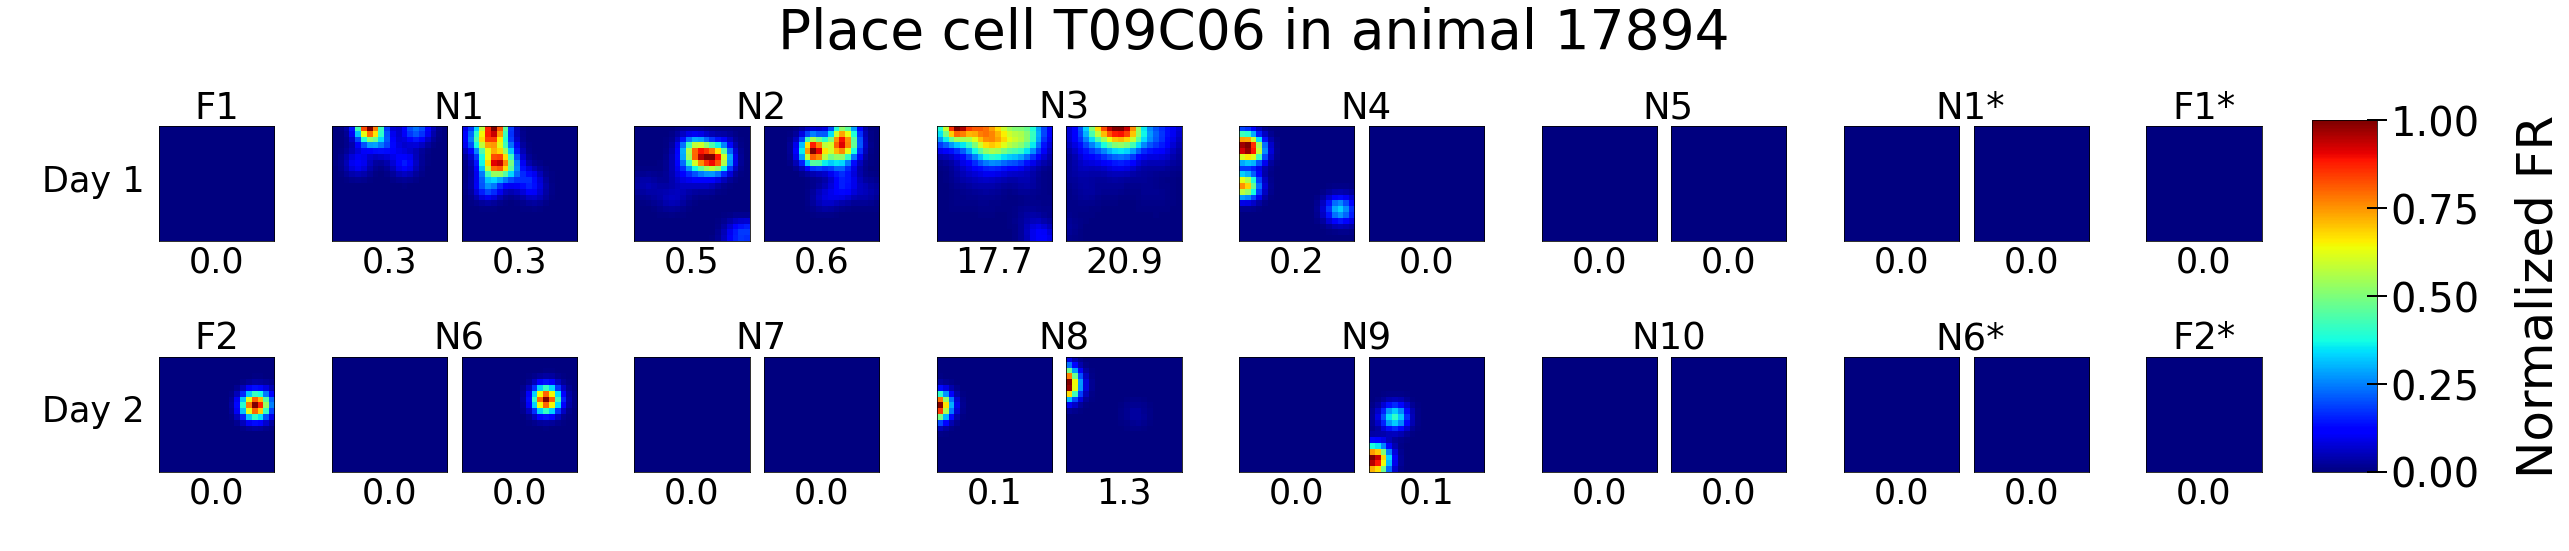

In [21]:
#The tetrode name of the cell as well as the name of the animal must be changes for each case


fig_1_raw = {'F1':[],
                'N1':[], 'N1!':[],
                'N2':[], 'N2!':[],
                'N3':[], 'N3!':[], 
                'N4':[], 'N4!': [],
                'N5':[], 'N5!':[], 
                'N1*':[],'N1*!':[],
                'F1*':[], 
                'F2':[], 
                'N6':[], 'N6!':[],
                'N7':[], 'N7!':[], 
                'N8':[], 'N8!':[], 
                'N9':[], 'N9!':[],
                'N10':[],'N10!':[],  
                'N6*':[],'N6*!':[],
                'F2*':[]}


#Get the data of the right cell [cell_number, :, :]. Cell numbers are saved in Image_dict and printed above 
for i in data:
    try: 
        fig_1_raw[i].append(data[i][53,:,:]) #this is where the cell number must be changed
                                             #The tetrode descriptions are printed above when the file runs. 
       
    except TypeError: 
        fig_1_raw[i].append([])              #this applies to cases when the data is missing 
        
fig = plt.figure()
b1 = 0.8    #top panel 
b2 = 0.0    #bottom panel                           
b3 = 0.85
w  = 0.4    #width 
h  = 0.4    #height

names = ['F1', 'N1', 'N2', 'N3', 'N4', 'N5', 'N1*', 'F2']
title = fig.add_axes([2.6,1.,w,h]).set_title("Place cell T09C06 in animal 17894" ,size=55, pad=20)
plt.axis("off")


ax0 = fig.add_axes([0.2,b1,w,h])                  #Initiating all 28 axes
ax1 = fig.add_axes([0.6,b1,w,h])
ax2 = fig.add_axes([0.9,b1,w,h]) 
ax3 = fig.add_axes([1.3,b1,w,h])  
ax4 = fig.add_axes([1.6,b1,w,h])
ax5 = fig.add_axes([2.0,b1,w,h])  
ax6 = fig.add_axes([2.3,b1,w,h])
ax7 = fig.add_axes([2.7,b1,w,h])  
ax8 = fig.add_axes([3.0,b1,w,h])
ax9 = fig.add_axes([3.4,b1,w,h])  
ax10 = fig.add_axes([3.7,b1,w,h])
ax11 = fig.add_axes([4.1,b1,w,h])  
ax12 = fig.add_axes([4.4,b1,w,h])
ax13 = fig.add_axes([4.8,b1,w,h]) 
 

ax14 = fig.add_axes([0.2,b2,w,h]) 
ax15 = fig.add_axes([0.6,b2,w,h])  
ax16 = fig.add_axes([0.9,b2,w,h])
ax17 = fig.add_axes([1.3,b2,w,h])  
ax18 = fig.add_axes([1.6,b2,w,h])
ax19 = fig.add_axes([2.0,b2,w,h])  
ax20 = fig.add_axes([2.3,b2,w,h])
ax21 = fig.add_axes([2.7,b2,w,h])  
ax22 = fig.add_axes([3.0,b2,w,h])
ax23 = fig.add_axes([3.4,b2,w,h])
ax24 = fig.add_axes([3.7,b2,w,h])  
ax25 = fig.add_axes([4.1,b2,w,h])
ax26 = fig.add_axes([4.4,b2,w,h])
ax27 = fig.add_axes([4.8,b2,w,h])

day1 = fig.add_axes([-0.085,0.55,w,h]).set_title('Day 1' ,size=35)
plt.axis("off")

day2 = fig.add_axes([-0.085,-0.25,w,h]).set_title('Day 2' ,size=35)
plt.axis("off")


s = 37

f1 = fig.add_axes([0.20 ,b1,w,h]).set_title('F1' ,size=s)
#plt.axis('off')
f1_1 = fig.add_axes([4.8 ,b1,w,h]).set_title('F1*' ,size=s)
#plt.axis('off')
n1 = fig.add_axes([0.76 ,b1,w,h]).set_title('N1' ,size=s)
plt.axis('off')
n2 = fig.add_axes([1.46 ,b1,w,h]).set_title('N2' ,size=s)
plt.axis('off')
n3 = fig.add_axes([2.16 ,b1,w,h]).set_title('N3' ,size=s)
plt.axis('off')
n4 = fig.add_axes([2.86 ,b1,w,h]).set_title('N4' ,size=s)
plt.axis('off')
n5 = fig.add_axes([3.56 ,b1,w,h]).set_title('N5' ,size=s)
plt.axis('off')
n1_1 = fig.add_axes([4.26 ,b1,w,h]).set_title('N1*' ,size=s)
plt.axis('off')

f2 = fig.add_axes([0.20 ,b2,w,h]).set_title('F2' ,size=s)
#plt.axis('off')
f2_1 = fig.add_axes([4.8 ,b2,w,h]).set_title('F2*' ,size=s)
#plt.axis('off')
n6 = fig.add_axes([0.76 ,b2,w,h]).set_title('N6' ,size=s)
plt.axis('off')
n7 = fig.add_axes([1.46 ,b2,w,h]).set_title('N7' ,size=s)
plt.axis('off')
n8 = fig.add_axes([2.16 ,b2,w,h]).set_title('N8' ,size=s)
plt.axis('off')
n9 = fig.add_axes([2.86 ,b2,w,h]).set_title('N9' ,size=s)
plt.axis('off')
n10 = fig.add_axes([3.56 ,b2,w,h]).set_title('N10' ,size=s)
plt.axis('off')
n6_1 = fig.add_axes([4.26 ,b2,w,h]).set_title('N6*' ,size=s)
plt.axis('off')

var = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14,     #setting a var list 
      ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26, ax27]


for a in var:                                                                              #turn all axis off 
    a.set_xticks([])
    a.set_yticks([])
    
i = 0

for pic in fig_1_raw.keys():                                                                #graphing the data 
    try: 
        st_image = fig_1_raw[pic][0]
        if np.max(st_image) > 0: 
            st_image = st_image/np.max(st_image)
    
       
        im = var[i].imshow(st_image, cmap=plt.cm.jet, vmin=0, vmax=1)
        var[i].set_xlabel(str(str(round(np.max(fig_1_raw[pic][0]),1))), fontsize = 35)   #standardizing with max. freq. 
        i = i+1
     
        
        
        
        if np.max(st_image)>0: 
            max_image = im
            
            

            
        
    except TypeError and ValueError: 
        image = np.zeros(shape=(20,20))
        imi = var[i].imshow(image, cmap='twilight')
        var[i].set_xlabel(('X'), fontsize = 25)
        var[i].set_xlabel('X', fontsize = 25)
        i=i+1
        

           

#image_test = np.zeros(shape=(20,20))                              #Activate only the first time you run
#imi_test = ax7.imshow(image_test, cmap='twilight')
#ax7.set_xlabel(('X'), fontsize = 25)
        
#max_image = [0,1]       




bari = fig.add_axes([5.25, 0.0, 0.15, 1.22])
cbar = fig.colorbar(max_image, cax=bari, ticks=[0,0.25,0.5,0.75,1]).set_label('Normalized FR', size=50, labelpad=35)
#bari.set_yticks([0,0.25,0.5,0.75,1], size=20, fontweight="bold")
#bari.set_yticklabels(['0','0.25','0.5','0.75','1'], size=20, fontweight="bold")
plt.tick_params(axis = 'y', length = 20, width= 2, direction='inout', labelsize=40)

    
#cbar = fig.colorbar(im, cax=cb_ax, ticks = [-1,-0.5,0,0.5,1]).set_label('Rate Map Correlation',size=25, color = 'black',
                                                                                    # labelpad=10, fontweight="bold")
#plt.tick_params(axis = 'y', length = 10, width= 1.5, direction='inout', labelsize=25) 



plt.savefig('place_cell_n_final_10_' + animal, dpi=300, bbox_inches='tight')

# Part 4: Plotting the data

In [12]:
animal_list = ['17894', '18024', '17769', '18237', '19251']  #List of animals we have data from 
rate_maps_all_animals  = {}                                  #Dict of all animal's ratemaps
                                                             #key 1 = animal,key 2 = session,value = 3darray of ratemaps
                                            
thresholds_all_animals = {}                                  #Dict of all animal's thresholds data 
                                                             #key 1 = animal, key 2 = session, value = Threshold_classification

for animal in animal_list:                                   #for each animal .....
    infile = open('rate_maps_' + animal,'rb')                #import the correct data 
    rate_maps_all_animals[animal] = pickle.load(infile)
    infile.close()
                                                       
for animal in animal_list:                                   #for each animal .....
    infile = open('threshold_n_' + animal,'rb')              #import the correct data
    thresholds_all_animals[animal] = pickle.load(infile)
    infile.close()  

# Plotting begins Here 

In [17]:
animal = str(input("animal"))
num_cell = int(input("num_cell"))
data       =  rate_maps_all_animals[animal]          #We plot one animal at a time 
thresholds =  thresholds_all_animals[animal]         #We plot one animal at a time  

animal17894
num_cell66


# Rate Map Correlation each sessions

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


nan
0.4632109440001664


<Figure size 432x288 with 0 Axes>

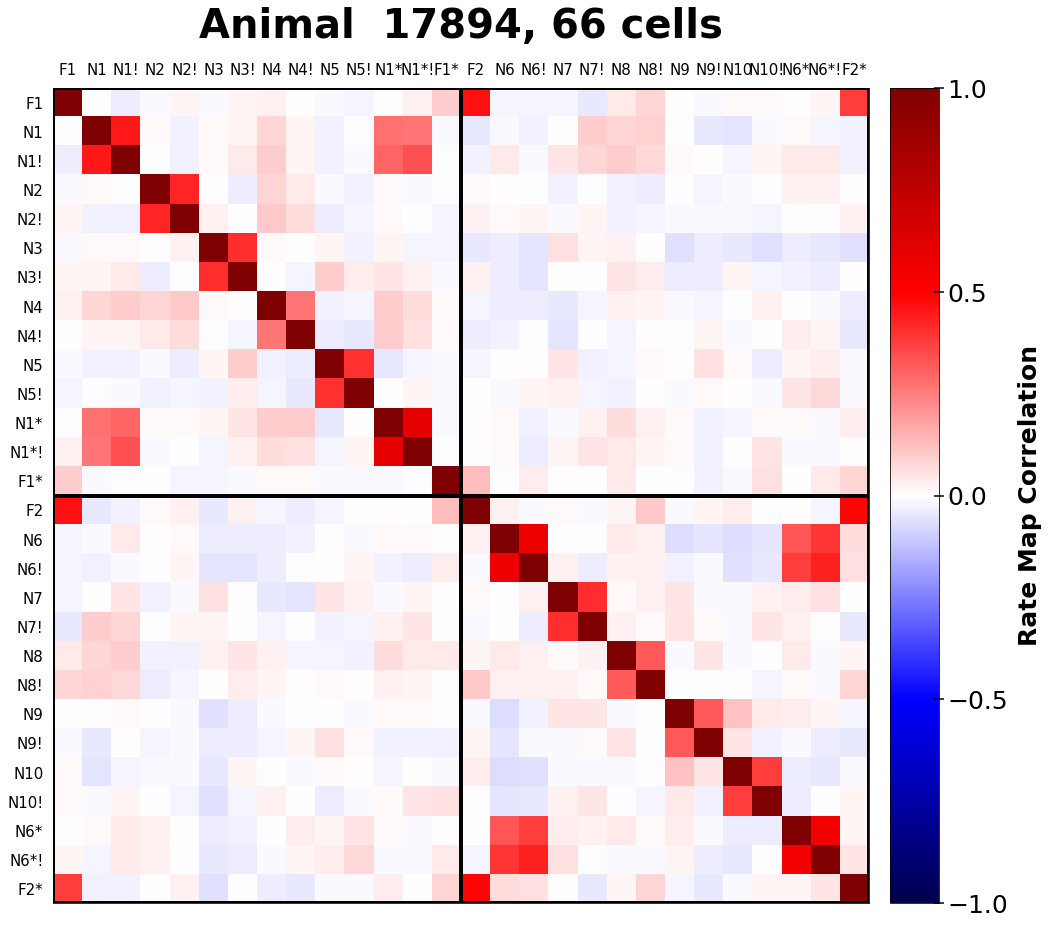

In [20]:
order_x = list(data.keys())
order_y = list(data.keys())
rate_map_plot = np.ndarray(shape = (len(order_x),len(order_y)))


#data = dictionary.         Key = Session name, value = 3darray of rate_maps (z=cell,y,x)
#thresholds = dictionary    Key1 = Sessionn name, Key2 = cell, value = threshold_classification 

y=-1
x=0
for s1 in order_y:                      #s1 = session 1
    y=y+1
    x=0
    for s2 in order_x:                  #s2 = session 2
        #print(len(int_rate_map_corr(s1,s2,data,thresholds)))
        rate_map_plot[y, x] = np.mean(int_rate_map_corr(s1,s2,data,thresholds)[0])
        case_counter = int_rate_map_corr(s1,s2,data,thresholds)[1]
        
        x=x+1
        if s1 == "N9!": 
            if s2 == 'N10':
                print(specific_rate_map_corr(s1,s2,data)[25])
                
 
        
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(rate_map_plot, cmap='seismic', vmin=-1, vmax=1)
plt.title('Animal  '+ animal +', ' +str(num_cell) + ' cells',size=40, fontweight='bold', pad =25)
#plt.title('Rat = '+ animal +', '+'n = ' +str(num_cell) + ' cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(order_x)))
ax.set_yticks(np.arange(len(order_y)))
ax.xaxis.tick_top()
ax.set_xticklabels(order_x, fontsize = 15, color = 'black')
ax.set_yticklabels(order_y,  fontsize = 15, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)   
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)   
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.91, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [-1,-0.5,0,0.5,1]).set_label('Rate Map Correlation',size=25, color = 'black',
                                                                                     labelpad=10, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 1.5, direction='inout', labelsize=25) 

if animal == '17490':
    ax.axvline(x=2., ymin=-1, ymax=12, color ='red', linewidth=1)  #left
    ax.axhline(y=2., xmin=-1, xmax=12, color ='red', linewidth=1)  #top 
    ax.axvline(x=10, ymin=-1, ymax=12, color ='red', linewidth=1)  #right
    ax.axhline(y=10, xmin=-1, xmax=12, color ='red', linewidth=1)  #bottom 

if animal == '17769': 
    ax.axvline(x=0., ymin=-1, ymax=12, color ='dimgrey', linewidth=2)
    ax.axhline(y=0., xmin=-1, xmax=12, color ='dimgrey', linewidth=2)
    
if animal == '19251': 
    ax.axvline(x=7., ymin=-1, ymax=12, color ='dimgrey', linewidth=2)
    ax.axhline(y=7., xmin=-1, xmax=12, color ='dimgrey', linewidth=2)

    
save_fig = False 
if save_fig:
    
    pickle_out = open('pie_chart_' +animal, 'wb')       
    pickle.dump(counters_total, pickle_out)
    pickle_out.close()
    
    #pickle_out = open('rate_map_allsession_final_' +animal, 'wb')       
    #pickle.dump(rate_map_plot, pickle_out)
    #pickle_out.close()
#plt.savefig('rate_map_allsession_top_new_2020_final' + animal, dpi=300, bbox_inches='tight')
    
    
print(rate_map_plot[0][14])

# Control of Neural Data 1

- the following four cells implement the random sampling control for the number of recorded cells
- we use the animal with the fewest number of cells as a standard
- essentially, we recreate figure 7C 100-times with random samples of the smallest number of cells available

In [48]:
comp_within = {'N1': ['N1!'],
               'N2': ['N2!'],
               'N3': ['N3!'], 
               'N4': ['N4!'],
               'N5': ['N5!'],
               'N6': ['N6!'],
               'N7': ['N7!'],  
               'N8': ['N8!'], 
               'N9': ['N9!'],
              'N10': ['N10!']}

comp_between = {'N1':  ['N1*', 'N1*!'],
                'N1!': ['N1*', 'N1*!'],
                'N6':  ['N6*', 'N6*!'],
                'N6!': ['N6*', 'N6*!']}

comp_f = {'F1':  ['F1*', 'F2', 'F2*'],
          'F1*': ['F2', 'F2*'],
          'F2':  ['F2*']}



In [203]:
from random import sample

animal_cell = {'17894': 66, '19251': 38, '18237':66, '17769': 35, '18024': 25}
within_session_all_animals = {}
between_session_all_animals = {}
f_co_all_animals = {}

for animal in animal_cell: 
    num_cell = animal_cell[animal]
    cells = np.arange(0,num_cell,1)        #define index of cell 
    cells = list(cells)                    #put them in a list 
    n = 0 
    limit = 100
    data       =  rate_maps_all_animals[animal] 
    thresholds =  thresholds_all_animals[animal] 
    
    within_session = []
    between_session = []
    f_co = []
    
    while n < limit: 
        
        random_sample = sample(cells,25)       #randomly sample them 
        random_sample.sort()                   #sort them 
        rand_data =      {'F1': [],                      #Will hold the data from rate_maps 
                'N1': [], 'N1!': [],
                'N2': [], 'N2!': [],
                'N3': [], 'N3!': [], 
                'N4': [], 'N4!': [],
                'N5': [], 'N5!': [], 
                'N1*':[], 'N1*!':[],
                'F1*':[], 
                'F2': [], 
                'N6': [], 'N6!': [],
                'N7': [], 'N7!': [], 
                'N8': [], 'N8!': [], 
                'N9': [], 'N9!': [],
                'N10':[], 'N10!':[],  
                'N6*':[], 'N6*!':[],
                'F2*':[]}    
        
        rand_thresholds =      {'F1': {},                      #Will hold the data from rate_maps 
                'N1': {}, 'N1!': {},
                'N2': {}, 'N2!': {},
                'N3': {}, 'N3!': {}, 
                'N4': {}, 'N4!': {},
                'N5': {}, 'N5!': {}, 
                'N1*':{}, 'N1*!':{},
                'F1*':{}, 
                'F2': {}, 
                'N6': {}, 'N6!': {},
                'N7': {}, 'N7!': {}, 
                'N8': {}, 'N8!': {}, 
                'N9': {}, 'N9!': {},
                'N10':{}, 'N10!':{},  
                'N6*':{}, 'N6*!':{},
                'F2*':{}}    
        
        
        for env in data.keys():
            counter = 0
            for cell in random_sample: 
                rand_data[env].append(data[env][cell])
                rand_thresholds[env][str(counter)] = thresholds[env][str(cell)]
                counter = counter+1
                   
        rate_map_plot = np.ndarray(shape = (len(order_x),len(order_y)))

        y=-1
        x=0
        for s1 in order_y:                      #s1 = session 1
            y=y+1
            x=0
            for s2 in order_x:                  #s2 = session 2
                rate_map_plot[y, x] = np.mean(int_rate_map_corr(s1,s2,rand_data,rand_thresholds)[0])
                x=x+1

    
        within_session.append(np.nanmean(get_corr_coeff(comp_within, rate_map_plot)))
        between_session.append(np.nanmean(get_corr_coeff(comp_between, rate_map_plot)))
        f_co.append(np.nanmean(get_corr_coeff(comp_f, rate_map_plot)))
        
        n = n+1
      
    within_session_all_animals[animal] = within_session  
    between_session_all_animals[animal] = between_session
    f_co_all_animals[animal] = f_co
        
    


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [202]:
print(within_session['18024'])
print(between_session['18024'])

w_min = 0.30663294009299513
b_min = 0.13334249823900574

0.30663294009299513
0.13334249823900574


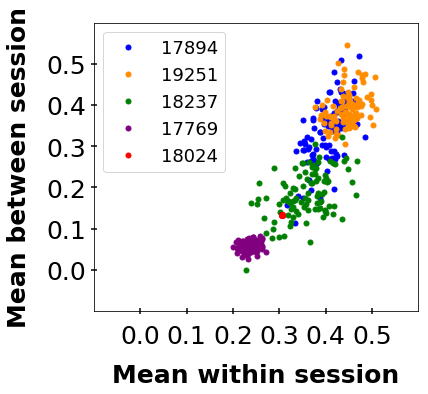

In [214]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
  
color_dict = {'17894': 'blue', '18237': 'green',  '17769':'purple', '19251':'darkorange', '18024': 'red'}

#for animal in animal_cell: 
    #for num in range(limit): 
      #  ax.plot(within_session_all_animals[animal][num], 
       #     between_session_all_animals[animal][num], color='black', marker='o', markersize=5, 
         #   markerfacecolor=color_dict[animal], markeredgecolor=color_dict[animal],linewidth=3)


for animal in animal_cell:
    ax.plot(within_session_all_animals[animal], 
            between_session_all_animals[animal], 'o', markersize=5, 
            markerfacecolor=color_dict[animal], markeredgecolor=color_dict[animal],linewidth=3, label=animal)        
        
        
        
        
        
        
#ax.set_title('Mean RMC of within vs. between sessions', size=16, fontweight='bold', pad = 25 )
ax.set_ylabel('Mean between session',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=15, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=15, pad=10)
plt.xlim(-0.0,0.6)
plt.ylim(-0.0,0.6)
ax.legend(loc='upper left', prop={'size': 18})




ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)


plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])



#plt.savefig('Control_1_final' + animal, dpi=300, bbox_inches='tight')  #save the figure

# Control for Neural Data 2

- another sampling control this time comparing the animal with the fewest to the most recorded cells


In [3]:
animal_list = ['17894', '18024', '17769', '18237', '19251']  #List of animals we have data from 
rate_maps_all_animals  = {}                                  #Dict of all animal's ratemaps
                                                             #key 1 = animal,key 2 = session,value = 3darray of ratemaps
                                            
thresholds_all_animals = {}                                  #Dict of all animal's thresholds data 
                                                             #key 1 = animal, key 2 = session, value = Threshold_classification

for animal in animal_list:                                   #for each animal .....
    infile = open('rate_maps_' + animal,'rb')                #import the correct data 
    rate_maps_all_animals[animal] = pickle.load(infile)
    infile.close()
                                                       
for animal in animal_list:                                   #for each animal .....
    infile = open('threshold_n_' + animal,'rb')              #import the correct data
    thresholds_all_animals[animal] = pickle.load(infile)
    infile.close()  

    
animal = str(input("animal"))
num_cell = int(input("num_cell"))

animal17894
num_cell66


In [37]:
from random import sample
cells = np.arange(0,num_cell,1)        #define index of cell 
cells = list(cells)                    #put them in a list 
n = 0 
limit = 100
data       =  rate_maps_all_animals[animal] 
thresholds =  thresholds_all_animals[animal] 
f1_f2_tot = [] 

while n < limit:  
    random_sample = sample(cells,25)       #randomly sample them 
    random_sample.sort()                   #sort them 
    rand_data =      {'F1': [],                    
                'N1': [], 'N1!': [],
                'N2': [], 'N2!': [],
                'N3': [], 'N3!': [], 
                'N4': [], 'N4!': [],
                'N5': [], 'N5!': [], 
                'N1*':[], 'N1*!':[],
                'F1*':[], 
                'F2': [], 
                'N6': [], 'N6!': [],
                'N7': [], 'N7!': [], 
                'N8': [], 'N8!': [], 
                'N9': [], 'N9!': [],
                'N10':[], 'N10!':[],  
                'N6*':[], 'N6*!':[],
                'F2*':[]}    
        
    rand_thresholds =      {'F1': {},                     
                'N1': {}, 'N1!': {},
                'N2': {}, 'N2!': {},
                'N3': {}, 'N3!': {}, 
                'N4': {}, 'N4!': {},
                'N5': {}, 'N5!': {}, 
                'N1*':{}, 'N1*!':{},
                'F1*':{}, 
                'F2': {}, 
                'N6': {}, 'N6!': {},
                'N7': {}, 'N7!': {}, 
                'N8': {}, 'N8!': {}, 
                'N9': {}, 'N9!': {},
                'N10':{}, 'N10!':{},  
                'N6*':{}, 'N6*!':{},
                'F2*':{}}    
        
        
    for env in data.keys():
        counter = 0
        for cell in random_sample: 
            rand_data[env].append(data[env][cell])
            rand_thresholds[env][str(counter)] = thresholds[env][str(cell)]
            counter = counter+1
                   
    rate_map_plot = np.ndarray(shape = (len(order_x),len(order_y)))

    y=-1
    x=0
    for s1 in order_y:                      #s1 = session 1
        y=y+1
        x=0
        for s2 in order_x:                  #s2 = session 2
            rate_map_plot[y, x] = np.mean(int_rate_map_corr(s1,s2,rand_data,rand_thresholds)[0])
            x=x+1

    f1_f2 = rate_map_plot[0][14]
    f1_f2_tot.append(f1_f2)
    n = n+1
    
f1_f2_tot

[0.3970252074390408,
 0.5199019713409536,
 0.34758605230744155,
 0.6343497920754848,
 0.4947309789914316,
 0.49495875617768625,
 0.38481912052417666,
 0.4981452297599536,
 0.44152076706659416,
 0.4254383077788598,
 0.4652653738314622,
 0.5663081360555068,
 0.4076983555153534,
 0.3208311116759289,
 0.5356248274212267,
 0.3804350465713466,
 0.4765040605930449,
 0.7388305857161387,
 0.44493420065686146,
 0.43452352902634744,
 0.4457970910668377,
 0.3671628120231905,
 0.44338337962713503,
 0.5010445019317531,
 0.3360053612536062,
 0.32746688818096,
 0.49430212515825556,
 0.35682246514454047,
 0.2506646576012024,
 0.3629646211326447,
 0.593699928877825,
 0.6549742108276231,
 0.43357836417721474,
 0.44260470536641394,
 0.3286632636763403,
 0.40133572022338654,
 0.4957118034606004,
 0.4702806917544054,
 0.4260667024471675,
 0.43094677643339396,
 0.2614957081988028,
 0.4037347324920688,
 0.49225911568139913,
 0.6251408907161252,
 0.4186478522382472,
 0.37769282578811003,
 0.35580699847963665,


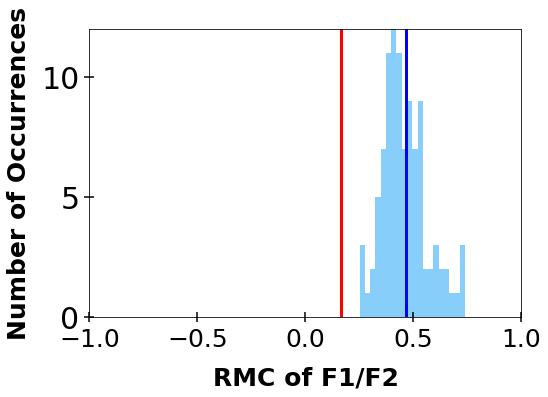

In [38]:
from matplotlib import colors 
fig = plt.figure()
#fig.suptitle('Comparison of F1 vs. F2 for 17894', size=20, fontweight='bold', y=1.1) #Add title 
n_bins=20

ax  = fig.add_axes([0,0,1,1])


# Creating histogram 
N, bins, patches = ax.hist(f1_f2_tot,  bins = n_bins, color='lightskyblue') 
  
# Setting color 
#fracs = ((N**(1 / 5)) / N.max()) 
#norm = colors.Normalize(fracs.min(), fracs.max()) 
  
#for thisfrac, thispatch in zip(fracs, patches): 
    #color = plt.cm.winter(norm(thisfrac)) 
    #thispatch.set_facecolor(color) 


    

plt.ylim(0,12)
plt.yticks([0,5,10])    
    
    
ax.set_xlim(-1,1)                                  
ax.set_xticks([-1,-0.5,0,0.5,1])                   
ax.set_xlabel("RMC of F1/F2", color='black', size=25, fontweight='bold', labelpad=15)
ax.set_ylabel('Number of Occurrences', color='black', size=25, fontweight='bold', labelpad=10)
    #axe[i].set_xscale("log")
    #axe[i].set_xlim(10**-2,10**1.5)
ax.tick_params(length = 10, width= 1.5, direction='inout', labelsize=25, pad=5, color='black') 
ax.tick_params(axis='y', length = 10, width= 1.5, direction='inout', labelsize=30, pad=5, color='black') 
#0.49982018381599247   
ax.axvline(x=0.46321094400016627,ymin=0,ymax=1, color='blue', linewidth=3)

ax.axvline(x=0.16425936587773535 ,ymin=0,ymax=1, color='red', linewidth=3)

#plt.savefig('Control_2_final_3_axis' + animal, dpi=300, bbox_inches='tight')

# Part 5: Histograms of individual correlations 

Which animal18237
how many cells?66
KstestResult(statistic=0.6718022942098815, pvalue=1.254286156284381e-81)
KstestResult(statistic=0.3692772818888569, pvalue=9.992007221626409e-16)
KstestResult(statistic=0.0, pvalue=1.0)
KstestResult(statistic=0.4316221064320492, pvalue=3.3306690738754696e-16)


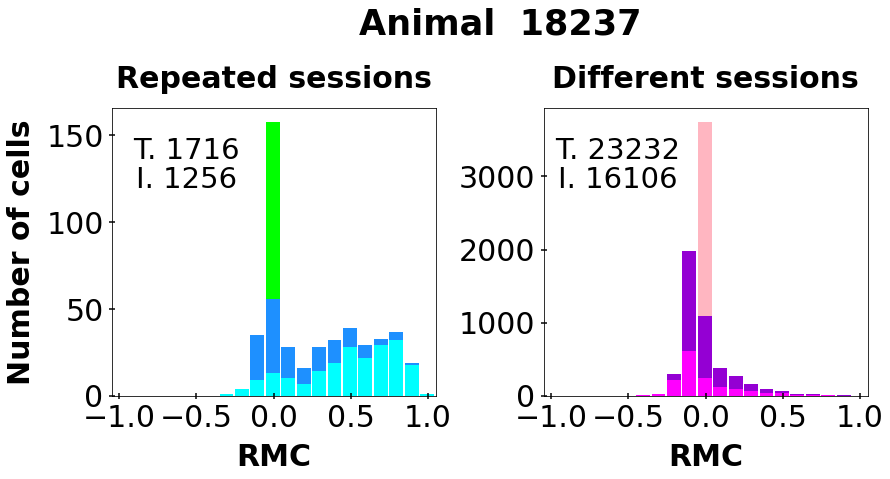

In [68]:
animal = str(input('Which animal'))
num_cell = int(input("how many cells?"))

data       =  rate_maps_all_animals[animal]          #We plot one animal at a time 
thresholds =  thresholds_all_animals[animal]         #We plot one animal at a time  


sessions_rep = ['F1','N1','N1!','N2','N3','N4','N5','N1*','F1*',
             'F2','N6','N6!','N7','N8','N9','N10','N6*']


rep_overview = {'repeated_above_above':[], 'repeated_above_below':[], 'repeated_above_zero':[], 
                    'repeated_excluded': 0, 'repeated_total':0}

for s1 in sessions_rep:
    s2 = all_repeated_sessions(s1)
    for x in s2:
        results = int_rate_map_corr_2(s1,x,data,thresholds)
        cell_corr = results[0]
        case_desc = results[1]
        excluded_units = results[2]
        rep_overview['repeated_excluded'] = rep_overview['repeated_excluded'] + excluded_units 

        for cell in range(len(cell_corr)): 
            if case_desc[cell] == 'above_above': 
                rep_overview ['repeated_above_above'].append(cell_corr[cell])
               
                
            elif case_desc[cell] == 'above_zero':
                rep_overview ['repeated_above_zero'].append(cell_corr[cell])
              
                
            elif case_desc[cell] == 'above_below':
                rep_overview ['repeated_above_below'].append(cell_corr[cell])
                
                
repeated = [rep_overview['repeated_above_above'], 
            rep_overview['repeated_above_below'], 
            rep_overview['repeated_above_zero']]


rep_overview['repeated_total'] = len(rep_overview['repeated_above_above'])+len(rep_overview['repeated_above_zero']) \
               + len(rep_overview['repeated_above_below'])+rep_overview['repeated_excluded']
        
##############

diff_overview = {'diff_above_above':[], 'diff_above_below':[], 'diff_above_zero':[], 
                    'diff_excluded': 0, 'diff_total':0}   
       
sessions_diff = ['F1','N1', 'N1!', 'N2','N2!','N3','N3!','N4','N4!', 'N5','N5!', 'N1*','N1*!','F1*','F2',
                'N6', 'N6!', 'N7', 'N7!', 'N8', 'N8!','N9', 'N9!','N10', 'N10!','N6*','N6*!']       
        
for s1 in sessions_diff:
    s2 = all_different_sessions(s1)
    for x in s2:
        results = int_rate_map_corr_2(s1,x,data,thresholds)
        cell_corr = results[0]
        case_desc = results[1]
        excluded_units = results[2]
        diff_overview['diff_excluded'] = diff_overview['diff_excluded'] + excluded_units 
        
        for cell in range(len(cell_corr)): 
            
            if case_desc[cell] == 'above_above': 
                diff_overview ['diff_above_above'].append(cell_corr[cell])
                
            elif case_desc[cell] == 'above_zero':
                diff_overview ['diff_above_zero'].append(cell_corr[cell])
                
            elif case_desc[cell] == 'above_below':
                diff_overview ['diff_above_below'].append(cell_corr[cell])
        
different = [diff_overview['diff_above_above'], 
             diff_overview['diff_above_below'], 
             diff_overview['diff_above_zero']]        

diff_overview['diff_total'] = len(diff_overview['diff_above_above'])+len(diff_overview['diff_above_zero']) \
               + len(diff_overview['diff_above_below'])+diff_overview['diff_excluded']
      
#total_obs = [total_obs_rep,total_obs_diff]       
#total_excluded = [repeated_excluded,different_excluded]

#excluded_data = [total_obs,total_excluded]


d = [repeated, different]



colors = [['cyan', 'dodgerblue', 'lime'], ['magenta', 'darkviolet','lightpink']]
titles =['Repeated sessions', 'Different sessions']
fig = plt.figure()

fig.suptitle('Animal  ' + animal,             #Add title 
             size=35, fontweight='bold', x=0.9, y=1.35)
bin_edges = bins = np.round(np.arange(-1.05,1.15,0.1),2)
ax = fig.add_axes([0,0,0.75,1])
ax1 = fig.add_axes([1,0,0.75,1])
axe = [ax,ax1]
texts_total = [rep_overview['repeated_total'], diff_overview['diff_total']]
texts_ex = [rep_overview['repeated_excluded'], diff_overview['diff_excluded']]
i=0
for a in axe:
    a.hist(d[i], width=0.09, color=colors[i],bins=bin_edges, histtype='bar', stacked=True)
    
    #for x in d[0][0]: 
        #if x >= 0.95: 
           # print(x)
    a.set_xlim(-1.05,1.05) 
    a.set_xticks([-1,-0.5,0,0.5,1]) 
    a.tick_params(length = 6, width= 1.5, direction='inout', labelsize=30, pad=5)
    a.set_xlabel("RMC", color='black', size=30, fontweight='bold', labelpad=10)
    axe[0].set_ylabel('Number of cells', color='black', size=30, fontweight='bold', labelpad=10)
    #a.axvline(x=np.mean(d[i]),ymin=0,ymax=1, color='red', linewidth=5)
    a.text(0.23,0.9,'T. ' + str(texts_total[i]), horizontalalignment='center', verticalalignment='top', fontsize=29, 
           transform = a.transAxes)
    a.text(0.23,0.8,'I. ' + str(texts_ex[i]), horizontalalignment='center', verticalalignment='top', fontsize=29, 
           transform = a.transAxes)
    
    a.set_title(titles[i], size=30, fontweight='bold', pad = 20 )
    i=i+1


rep_diff={'rep':repeated, 'diff': different, 'total':texts_total, 'excluded':texts_ex  }

save_short = False  
if save_short:
    pickle_out = open('rep_diff_n_' +animal, 'wb')      
    pickle.dump(rep_diff, pickle_out)
    pickle_out.close()
    

##### STATISTICAL TESTS #### 

print(stats.kstest(repeated[0], different[0]))  #above above
print(stats.kstest(repeated[1], different[1]))  #above below 
print(stats.kstest(repeated[2], different[2]))  #above zero 

repeated_total = list()
for x in repeated: 
    repeated_total.extend(x)
    
different_total = list()
for x in different: 
    different_total.extend(x)
    
print(stats.kstest(repeated_total, different_total))  #whole distributions repeated vs different 

#save_fig = False   
#if save_fig: 
 #   plt.savefig('ind_cell_n_final' + animal, dpi=300, bbox_inches='tight')

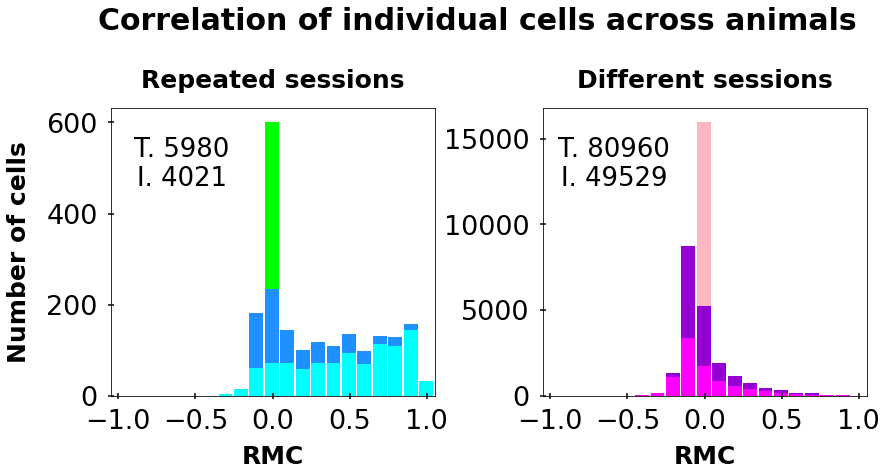

In [10]:
animal_list = ['17894', '18237', '18024', '17769', '19251']           #List of animals we have data from 
rep_diff_all_animals = {}                                             #List of files we will import 

for an in animal_list:
    infile = open('rep_diff_n_' + an,'rb')                            #import the correct data 
    rep_diff_all_animals[an] = pickle.load(infile)
    infile.close()

                
repeated_above_above_all_animals  = []
repeated_above_zero_all_animals   = []
repeated_above_below_all_animals  = []

different_above_above_all_animals  = []
different_above_zero_all_animals   = []
different_above_below_all_animals  = []

total_obs_all_animals = [0,0]                     #repeated, diff
total_excluded_all_animals = [0,0]                #repeated, diff 


for an in animal_list:
    repeated_above_above_all_animals = repeated_above_above_all_animals + rep_diff_all_animals[an]['rep'][0]
    repeated_above_zero_all_animals = repeated_above_zero_all_animals + rep_diff_all_animals[an]['rep'][1]
    repeated_above_below_all_animals = repeated_above_below_all_animals + rep_diff_all_animals[an]['rep'][2]
    total_obs_all_animals[0] = total_obs_all_animals[0]+ rep_diff_all_animals[an]['total'][0]
    total_excluded_all_animals[0] = total_excluded_all_animals[0] + rep_diff_all_animals[an]['excluded'][0]
    
    different_above_above_all_animals = different_above_above_all_animals + rep_diff_all_animals[an]['diff'][0]
    different_above_zero_all_animals = different_above_zero_all_animals + rep_diff_all_animals[an]['diff'][1]
    different_above_below_all_animals = different_above_below_all_animals + rep_diff_all_animals[an]['diff'][2]
    total_obs_all_animals[1] = total_obs_all_animals[1]+ rep_diff_all_animals[an]['total'][1]
    total_excluded_all_animals[1] = total_excluded_all_animals[1] + rep_diff_all_animals[an]['excluded'][1]
    

    
repeated_all_animals = [repeated_above_above_all_animals,repeated_above_zero_all_animals,repeated_above_below_all_animals]
different_all_animals = [different_above_above_all_animals,different_above_zero_all_animals,different_above_below_all_animals]
data = [repeated_all_animals,different_all_animals]   

colors = [['cyan', 'dodgerblue', 'lime'], ['magenta', 'darkviolet', 'lightpink']]
titles = ['Repeated sessions',  'Different sessions']
fig = plt.figure()
fig.suptitle('Correlation of individual cells across animals',             #Add title 
             size=30, fontweight='bold', x=0.85, y=1.35)
bin_edges = bins = np.round(np.arange(-1.05,1.15,0.1),2)
ax = fig.add_axes([0,0,0.75,1])
ax1 = fig.add_axes([1,0,0.75,1])
axe = [ax,ax1]
i=0
for a in axe:
    a.hist(data[i], width=0.09, color=colors[i],bins=bin_edges, histtype='bar', stacked=True)
    a.set_xlim(-1.05,1.05) 
    a.set_xticks([-1,-0.5,0,0.5,1]) 
    a.tick_params(length = 6, width= 1.5, direction='inout', labelsize=27, pad=10)
    a.set_xlabel("RMC", color='black', size=25, fontweight='bold', labelpad=10)
    axe[0].set_ylabel('Number of cells', color='black', size=25, fontweight='bold', labelpad=15)
    #a.axvline(x=np.nanmean(data[i]),ymin=0,ymax=1, color='red', linewidth=5)
    
    a.text(0.22,0.9,'T. ' + str(total_obs_all_animals[i]), horizontalalignment='center', verticalalignment='top', fontsize=26, 
           transform = a.transAxes)
    a.text(0.22,0.8,'I. ' + str(total_excluded_all_animals[i]), horizontalalignment='center', verticalalignment='top', fontsize=26, 
           transform = a.transAxes)
    
    a.set_title(titles[i], size=25, fontweight='bold', pad = 20 )
    i=i+1

#plt.savefig('ind_cell_population_n_final', dpi=300, bbox_inches='tight')

# Part 7: Averaging across animals 

<Figure size 432x288 with 0 Axes>

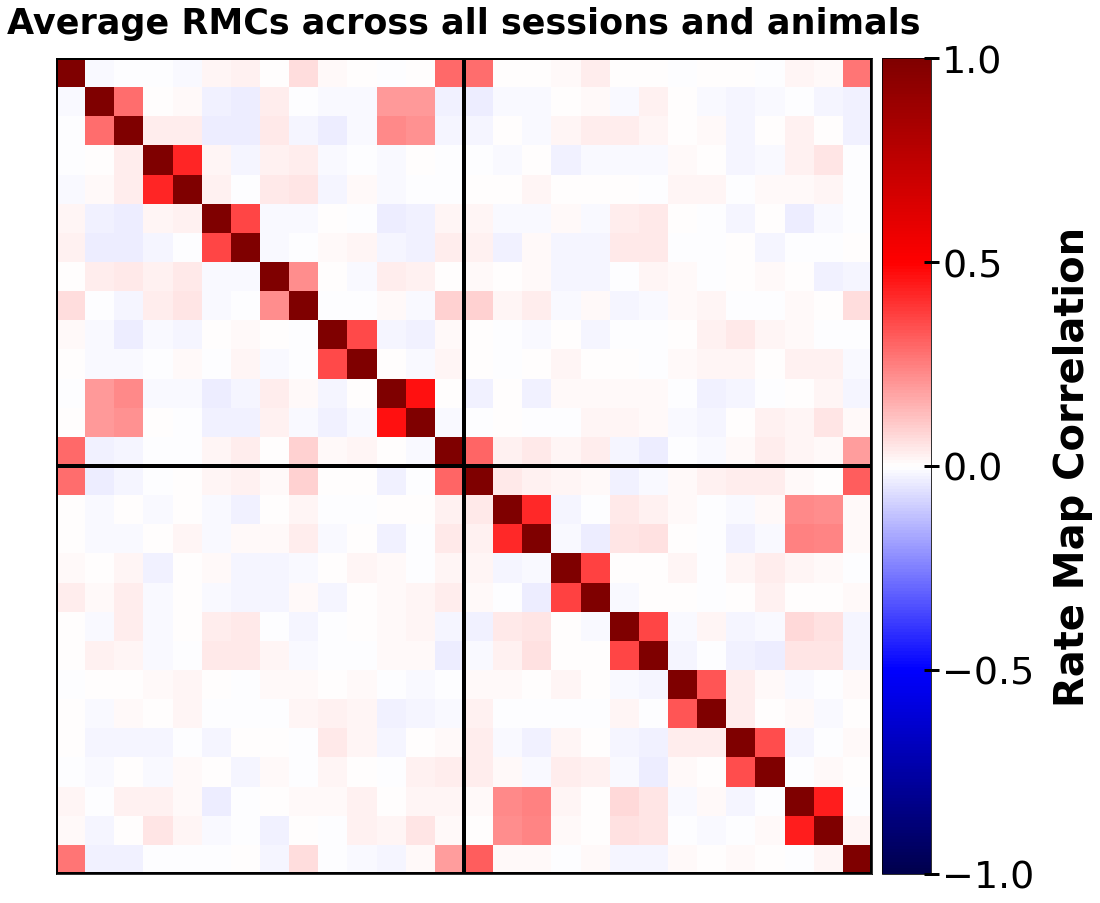

In [14]:
animal_list = ['17894', '18237', '19251', '17769', '18024']    
infile_list = []                                              
for animal in animal_list:                           
    infile = open('rate_map_allsession_final_' + animal,'rb')   #import the correct data 
    infile_list.append(pickle.load(infile))
    infile.close()

mat1 = infile_list[0]                               
mat2 = infile_list[1]
mat3 = infile_list[2]
mat4 = infile_list[3]
mat5 = infile_list[4]

#order_x = list(rate_maps_all_animals['17894'].keys())                           #use the correct labels 
#order_y = list(rate_maps_all_animals['17894'].keys())
plot = corr_average(mat1, mat2, mat3, mat4, mat5)   
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='seismic', vmin=-1, vmax=1)
plt.title('Average RMCs across all sessions and animals',size=35, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
#ax.set_xticks(np.arange(len(order_x)))
#ax.set_yticks(np.arange(len(order_y)))
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.tick_top()
#ax.set_xticklabels(order_x, fontsize = 15, color = 'black')
#ax.set_yticklabels(order_y,  fontsize = 15, color = 'black')
#ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.90, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [-1,-0.5,0,0.5,1]).set_label('Rate Map Correlation',size=40, color = 'black',
                                                                                     labelpad=19, fontweight="bold")
plt.tick_params(axis = 'y', length = 15, width= 3, direction='inout', labelsize=38) 
#plt.savefig('rate_map_allsession_aver_2020_final', dpi=300, bbox_inches='tight')

# Part 8: Constructing the GLMs

- distribution of RMCs in F vs. N1/N6 repetitions 
- mean N between session vs.  mean F between session RMCs 
- mean N1 between session vs. mean N6 between session
- mean within session vs. mean between session RMCs

In [19]:
animal_list = ['17894', '18237', '19251', '17769','18024']     #animals 
infile_list = {}                                              

for an in animal_list:
    infile = open('rate_map_allsession_final_' + an,'rb')      #import the correct rate map correlation data 
    infile_list[an] = pickle.load(infile)
    infile.close()

infile_list['17769'][0][:] = np.nan
infile_list['17769'][:,0] = np.nan    
    
    
f_ind = {0:  [13,14,27],                                       #Defining indeces that correspind to the correlation coeff for rep. of F 
         13: [14,27],                                          #0=F1, 13=F1*, 14=F2, 27= F2*
         14: [27]}     

f_corr_dict_all = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for f correlation coefficients Keys:animal,values:corr_coeff for repetitions of f

for animal in animal_list:                                                     #For each animal 
    for x in f_ind:                                                            #For each f session 
        for y in f_ind[x]:                                                     #For each repetiotion 
            f_corr_dict_all[animal].append(infile_list[animal][x][y])          #Add the corr coeff to the f_corr_dict


n1_ind = {1:  [11,12],                                          #Defining indeces that correspind to the correlation coeff for rep. of N1 
          2:  [11,12]}                                          #1=N1, 2=N1!, 11=N1*, 12= N1*!
    

n1_dict = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}  
n6_dict = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}  
n_corr_dict_all = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for f correlation coefficients Keys:animal,values:corr_coeff for repetitions of f

for animal in animal_list:                                                     #For each animal 
    for x in n1_ind:                                                           #If the index is one we are interested in 
        for y in n1_ind[x]:     
            n_corr_dict_all[animal].append(infile_list[animal][x][y])
            n1_dict[animal].append(infile_list[animal][x][y])  #Add the correlation coefficient to the dict
            
            
n6_ind = {15:  [25,26],                                         #Defining indeces that correspind to the correlation coeff for rep. of N1 
          16:  [25,26]}                                         #15=N6, 16=N6!, 25=N6*, 26=N6*!

for animal in animal_list:                                      
    for x in n6_ind:    
        for y in n6_ind[x]:     
            n_corr_dict_all[animal].append(infile_list[animal][x][y])
            n6_dict[animal].append(infile_list[animal][x][y]) 
            


f_corr_tot_all = []                                             #Put all f correlations in one list, removing nans 
n_corr_tot_all = []                                             #Put all n correlations in one list, removing nans 

for animal in f_corr_dict_all: 
    for i in f_corr_dict_all[animal]:
        if not math.isnan(i):
            f_corr_tot_all.append(i)

for animal in n_corr_dict_all: 
    for i in n_corr_dict_all[animal]: 
        n_corr_tot_all.append(i)           




####### Some statistical tests of interest ########    
####### The last two kines that are printed will be the p_values reported in the distributions below (Fig. 6)
print(n_corr_tot_all)
print(len(n_corr_tot_all))
print(stats.shapiro(f_corr_tot_all))
print(stats.shapiro(n_corr_tot_all))
print(stats.anderson(f_corr_tot_all,dist='norm'))
print(stats.anderson(n_corr_tot_all,dist='norm'))
print(stats.ttest_ind(f_corr_tot_all, n_corr_tot_all, axis=0, equal_var=True, nan_policy='omit')) #Do the t test 
#print('DOF = ' + str((len(f_corr_tot_all)- 1) + (len(n_corr_tot_all)-1)))
#print('Cohen=' + str(cohen_d(f_corr_tot_all, n_corr_tot_all)))


x = f_corr_tot_all                     #Get the f_correlations 
y = n_corr_tot_all                     #Get the n_correlations 
F = np.var(x)/np.var(y)                #calculate the test statistic 
df1 = len(x) - 1                       #calculate the dof for x
df2 = len(y) - 1                       #calculate the dof for y 
p_val = scipy.stats.f.sf(F, df1, df2)  #F-test for equal variance with. The Null hypothesis is that variances are equal
print(p_val)                           #If p > 0.05 we fail to reject H0 
#print('DOF = ' + str((len(x)- 1) + (len(y)-1)))
#print('Cohen=' + str(cohen_d(x,y)))

#print(F)                               #This is the test statistic 
#print(stats.f_oneway(x,y))            #Test whether f and n have equal means 

[0.27611088913159165, 0.2678318061796765, 0.29815495867809133, 0.3374927583320429, 0.3302443619997041, 0.39200817985052894, 0.3765301779254258, 0.43597055506352284, 0.1766088125530604, 0.20230890993793776, 0.22743948100799866, 0.2136628707974231, 0.21350613292972329, 0.18294846043624932, 0.1592283269657959, 0.15586744640366898, 0.4446812734204195, 0.37904032562064943, 0.4745298859025138, 0.41133850285400203, 0.3455013086786937, 0.3795710907933395, 0.3412715638949283, 0.36079563392847325, 0.007618781320069166, 0.05068086492694176, 0.004069274435641888, -0.02814752188209417, 0.09540253733396072, 0.0713405050188371, 0.15056120493994485, 0.12432505256104592, 0.10637744858092846, 0.09361956710407458, 0.16627124481821118, 0.14753837762802996, 0.16753817736037327, 0.08941935716657566, 0.1868705718928735, 0.10910524136097914]
40
ShapiroResult(statistic=0.968410849571228, pvalue=0.5604110956192017)
ShapiroResult(statistic=0.9629507064819336, pvalue=0.2110351324081421)
AndersonResult(statistic=0

In [20]:
swarmplot_data = {'animals': [], 'corr_coeff': [], 'room':[]}

for animal in f_corr_dict_all: 
    for coeff in f_corr_dict_all[animal]:
        swarmplot_data['animals'].append(animal)
        swarmplot_data['corr_coeff'].append(coeff)
        swarmplot_data['room'].append('F')
        
for animal in n_corr_dict_all: 
    for coeff in n_corr_dict_all[animal]:
        swarmplot_data['animals'].append(animal)
        swarmplot_data['corr_coeff'].append(coeff)
        swarmplot_data['room'].append('N')
swarmplot_d = pd.DataFrame(data=swarmplot_data) 

Text(0.5, 0.89, 'p_var = 0.08')

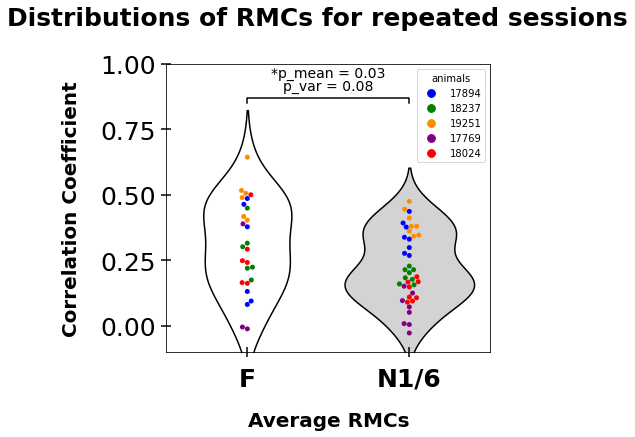

In [21]:
fig = plt.figure()
fig.suptitle('Distributions of RMCs for repeated sessions', size=25, fontweight='bold', x = 1.35, y=1.2)

ax1 = fig.add_axes([1,0,0.75,1])
ax1 = sns.violinplot(x='room', y='corr_coeff', data=swarmplot_d, linecolor='black',
                     palette=['white', 'lightgrey'],inner=None) 


ax1.collections[0].set_edgecolor('black')
ax1.collections[1].set_edgecolor('black')

ax1 =sns.swarmplot(x='room', y='corr_coeff', data=swarmplot_d, hue='animals',
                   palette=['blue','green', 'darkorange', 'purple', 'red'])               

ax1.set_xticklabels(['F','N1/6'], color='black', fontsize=20, fontweight='bold')
ax1.tick_params(axis='x',length = 10, width= 1.5, direction='inout', labelsize=25, pad=10)
ax1.tick_params(axis='y',length = 10, width= 1.5, direction='inout', labelsize=25, pad=5)
#ax1.set_title('All sessions', size=20, fontweight='bold', pad = 20 )
ax1.set_ylabel('Correlation Coefficient', color='black', size=20, fontweight='bold', labelpad=20)
ax1.set_xlabel('Average RMCs', color='black', size=20, fontweight='bold', labelpad=20)
lines = plt.setp(ax1.lines, color='black', linewidth=2.0)
ax1.set_ylim(-0.1,1)
# statistical annotation
x1, x2 = 0, 1   # columns 'F1' and 'N1/6' (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [0.85, 0.87, 0.87, 0.85], lw=1.5, color='black')
plt.text((x1+x2)*.5, 0.94, "*p_mean = 0.03", ha='center', va='bottom', color="black", size=14)
plt.text((x1+x2)*.5, 0.89, "p_var = 0.08", ha='center', va='bottom', color="black", size=14)
#plt.savefig('distribution_rep_sw_v_final', dpi=300, bbox_inches='tight')

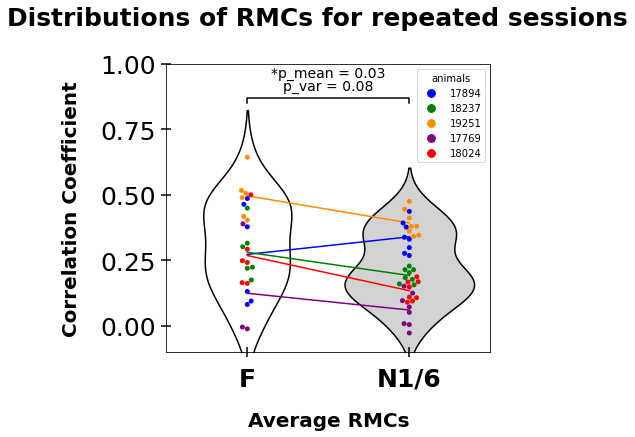

In [22]:
fig = plt.figure()
fig.suptitle('Distributions of RMCs for repeated sessions', size=25, fontweight='bold', x = 1.35, y=1.2)

ax1 = fig.add_axes([1,0,0.75,1])
ax1 = sns.violinplot(x='room', y='corr_coeff', data=swarmplot_d, linecolor='black',
                     palette=['white', 'lightgrey'],inner=None) 


ax1.collections[0].set_edgecolor('black')
ax1.collections[1].set_edgecolor('black')

ax1 =sns.swarmplot(x='room', y='corr_coeff', data=swarmplot_d, hue='animals',
                   palette=['blue','green', 'darkorange', 'purple', 'red'])               

ax1.set_xticklabels(['F','N1/6'], color='black', fontsize=20, fontweight='bold')
ax1.tick_params(axis='x',length = 10, width= 1.5, direction='inout', labelsize=25, pad=10)
ax1.tick_params(axis='y',length = 10, width= 1.5, direction='inout', labelsize=25, pad=5)
#ax1.set_title('All sessions', size=20, fontweight='bold', pad = 20 )
ax1.set_ylabel('Correlation Coefficient', color='black', size=20, fontweight='bold', labelpad=20)
ax1.set_xlabel('Average RMCs', color='black', size=20, fontweight='bold', labelpad=20)
lines = plt.setp(ax1.lines, color='black', linewidth=2.0)
ax1.set_ylim(-0.1,1)
# statistical annotation
x1, x2 = 0, 1   # columns 'F1' and 'N1/6' (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [0.85, 0.87, 0.87, 0.85], lw=1.5, color='black')
plt.text((x1+x2)*.5, 0.94, "*p_mean = 0.03", ha='center', va='bottom', color="black", size=14)
plt.text((x1+x2)*.5, 0.89, "p_var = 0.08", ha='center', va='bottom', color="black", size=14)

c=['blue','green', 'darkorange', 'purple', 'red']
i=0
for a in list(swarmplot_d['animals'].unique()): 
    f = 0
    n = 1
    ax1.plot([f,n],[np.nanmean(f_corr_dict_all[a]),np.nanmean(n_corr_dict_all[a])], color=c[i])
    i=i+1


#plt.savefig('distribution_rep_sw_v_final_mean_2', dpi=300, bbox_inches='tight')

In [23]:
mean_swarmplot_data = {'animals': [], 'corr_coeff': [], 'room':[]}

for animal in f_corr_dict_all: 
    mean_swarmplot_data['animals'].append(animal)
    mean_swarmplot_data['corr_coeff'].append(np.nanmean(f_corr_dict_all[animal]))
    mean_swarmplot_data['room'].append('F')
        
for animal in n_corr_dict_all: 
    mean_swarmplot_data['animals'].append(animal)
    mean_swarmplot_data['corr_coeff'].append(np.nanmean(n_corr_dict_all[animal]))
    mean_swarmplot_data['room'].append('N')

mean_swarmplot_d = pd.DataFrame(data=mean_swarmplot_data) 

In [24]:
#Very important cell: calculates the mean F and N corr for each animal and puts them in dicts. 

mean_f_corr = {}
f_corr_error = {}
mean_n1_corr = {}
n1_corr_error ={}
mean_n6_corr = {}
n6_corr_error ={}
mean_n_corr_all = {}
n_corr_all_error = {}

for animal in animal_list:
    mean_f_corr[animal] = np.nanmean(f_corr_dict_all[animal])
    f_corr_error[animal]= np.nanstd(f_corr_dict_all[animal])/np.sqrt(len(f_corr_dict_all[animal]))
    
for animal in animal_list:
    mean_n1_corr[animal] = np.mean(n1_dict[animal])
    n1_corr_error[animal]= np.nanstd(n1_dict[animal])/np.sqrt(len(n1_dict[animal]))
    
    
for animal in animal_list:
    mean_n6_corr[animal] = np.mean(n6_dict[animal]) 
    n6_corr_error[animal]= np.nanstd(n6_dict[animal])/np.sqrt(len(n6_dict[animal]))
    
for animal in animal_list:
    mean_n_corr_all[animal] = np.mean(n_corr_dict_all[animal]) 
    n_corr_all_error[animal]= np.nanstd(n_corr_dict_all[animal])/np.sqrt(len(n_corr_dict_all[animal]))
    
print(mean_n_corr_all)

{'17894': 0.339292960895073, '18237': 0.1914463051289822, '19251': 0.39209119813662746, '17769': 0.0594813373317934, '18024': 0.13334249823900574}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.600    
Dependent Variable: y                AIC:                -8.6444  
Date:               2021-12-09 14:20 BIC:                -9.4255  
No. Observations:   5                Log-Likelihood:     6.3222   
Df Model:           1                F-statistic:        7.009    
Df Residuals:       3                Prob (F-statistic): 0.0772   
R-squared:          0.700            Scale:              0.0077821
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0294     0.1032   -0.2844   0.7946   -0.3578   0.2991
x1           0.8771     0.3313    2.6474   0.0772   -0.1773   1.9315
------------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:           1.157
Pro

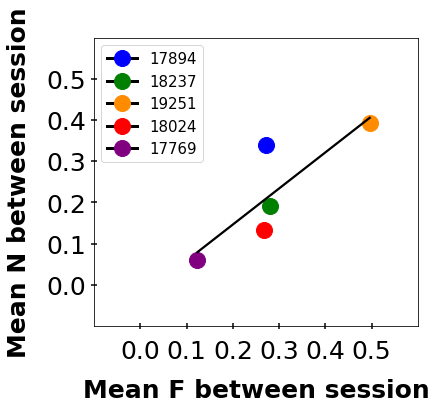

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    

ax.plot(mean_f_corr['17894'], mean_n_corr_all['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(mean_f_corr['18237'], mean_n_corr_all['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(mean_f_corr['19251'], mean_n_corr_all['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(mean_f_corr['18024'], mean_n_corr_all['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(mean_f_corr['17769'], mean_n_corr_all['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')

#sns.regplot(x,y,  ci=None, color= 'black')

#ax.set_title('Mean Corrleation of F vs. N1/6', size=16, fontweight='bold', pad = 25 )
ax.set_ylabel('Mean N between session',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean F between session',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left', prop={'size':15})
#ax.set_ylim(0,1)
#ax.set_xlim(0,1)
#plt.text(x = 0.1, y = 0.52, s="R-sq = 0.60", size=30)
#plt.text(x = 0.1, y = 0.46, s="p      = 0.08", size=30)


x = np.array(list(mean_f_corr.values())).reshape((-1, 1))
y = np.array(list(mean_n_corr_all.values()))

#yer = 

import statsmodels.api as sm
mod = sm.OLS(y,sm.add_constant(x))
fii = mod.fit()
print(fii.summary2())

sns.regplot(x,y,  ci=None, color= 'black')
plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])


print(scipy.stats.linregress(np.array(list(mean_f_corr.values())),np.array(list(mean_n_corr_all.values()))))
#plt.savefig('corr_f_n_final', dpi=300, bbox_inches='tight')

In [26]:
print(mean_f_corr.values())
print(mean_f_corr)
print(mean_n_corr_all.values())
print(mean_n_corr_all)

dict_values([0.2718854037288801, 0.2802277044522978, 0.4957132778500946, 0.12362002634183512, 0.2678207801158275])
{'17894': 0.2718854037288801, '18237': 0.2802277044522978, '19251': 0.4957132778500946, '17769': 0.12362002634183512, '18024': 0.2678207801158275}
dict_values([0.339292960895073, 0.1914463051289822, 0.39209119813662746, 0.0594813373317934, 0.13334249823900574])
{'17894': 0.339292960895073, '18237': 0.1914463051289822, '19251': 0.39209119813662746, '17769': 0.0594813373317934, '18024': 0.13334249823900574}


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.723    
Dependent Variable: y                AIC:                -11.3718 
Date:               2021-12-09 14:20 BIC:                -12.1529 
No. Observations:   5                Log-Likelihood:     7.6859   
Df Model:           1                F-statistic:        11.43    
Df Residuals:       3                Prob (F-statistic): 0.0431   
R-squared:          0.792            Scale:              0.0045102
---------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------
const     0.0818      0.0540    1.5168    0.2266    -0.0899    0.2536
x1        0.7120      0.2106    3.3806    0.0431     0.0417    1.3822
------------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:           1.96

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fbae4604850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

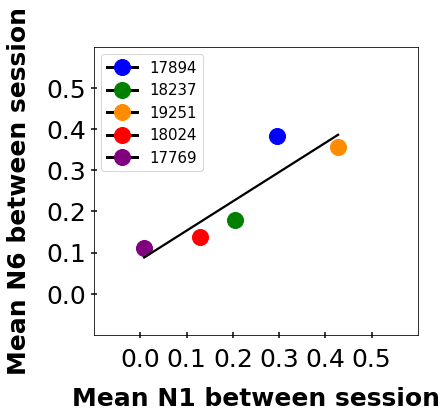

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    

ax.plot(mean_n1_corr['17894'], mean_n6_corr['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(mean_n1_corr['18237'], mean_n6_corr['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(mean_n1_corr['19251'], mean_n6_corr['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(mean_n1_corr['18024'], mean_n6_corr['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(mean_n1_corr['17769'], mean_n6_corr['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



#ax.set_title('Mean RMCs of N1 vs. N6', size=16, fontweight='bold', pad = 25 )
ax.set_ylabel('Mean N6 between session',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean N1 between session',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
#ax.set_ylim(5,15)
ax.legend(loc='upper left', prop={'size':15})
#ax.set_ylim(5,15)

#plt.text(x = 0.1, y = 0.52, s="R-sq = 0.72", size=30)
#plt.text(x = 0.1, y = 0.46, s="*p    = 0.04", size=30)


x3 = np.array(list(mean_n1_corr.values())).reshape((-1, 1))
y3 = np.array(list(mean_n6_corr.values()))

mod = sm.OLS(y3,sm.add_constant(x3))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
print(fii.pvalues[0])

sns.regplot(x3,y3,  ci=None, color= 'black')
plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])

#plt.savefig('corr_n_n_final', dpi=300, bbox_inches='tight')

In [28]:
comp_within = {'N1': ['N1!'],
               'N2': ['N2!'],
               'N3': ['N3!'], 
               'N4': ['N4!'],
               'N5': ['N5!'],
               'N6': ['N6!'],
               'N7': ['N7!'],  
               'N8': ['N8!'], 
               'N9': ['N9!'],
              'N10': ['N10!']}

comp_between = {'N1':  ['N1*', 'N1*!'],
                'N1!': ['N1*', 'N1*!'],
                'N6':  ['N6*', 'N6*!'],
                'N6!': ['N6*', 'N6*!']}

comp_f = {'F1':  ['F1*', 'F2', 'F2*'],
          'F1*': ['F2', 'F2*'],
          'F2':  ['F2*']}

       
within_session = {}
between_session = {}
f_co = {}
    
for animal in animal_list: 
    within_session[animal] = np.nanmean(get_corr_coeff(comp_within, infile_list[animal]))
    between_session[animal] = np.nanmean(get_corr_coeff(comp_between, infile_list[animal]))
    f_co[animal] = np.nanmean(get_corr_coeff(comp_f, infile_list[animal]))

0.9496243328779591
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.933    
Dependent Variable: y                AIC:                -17.5614 
Date:               2021-12-09 14:21 BIC:                -18.3426 
No. Observations:   5                Log-Likelihood:     10.781   
Df Model:           1                F-statistic:        56.55    
Df Residuals:       3                Prob (F-statistic): 0.00487  
R-squared:          0.950            Scale:              0.0013079
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -0.3542     0.0785   -4.5145   0.0203   -0.6038   -0.1045
x1          1.6582     0.2205    7.5201   0.0049    0.9565    2.3599
------------------------------------------------------------------
Omnibus:              nan           Durbin-Watson: 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fbae475c6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

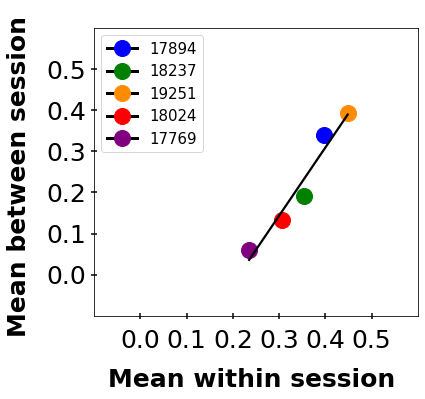

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



#ax.set_title('Mean RMC of within vs. between sessions', size=16, fontweight='bold', pad = 25 )
ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
#ax.set_ylim(5,15)
ax.legend(loc='upper left', prop={'size':15})

#plt.text(x = 0.1, y = 0.52, s="R-sq = 0.93", size=30)
#plt.text(x = 0.1, y = 0.46, s="*p    = 0.005", size=30)

from sklearn.linear_model import LinearRegression
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))
reg = LinearRegression().fit(x1, y1)
print(reg.score(x1, y1))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(x1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
print(fii.pvalues[0])



sns.regplot(x1,y1,  ci=None, color= 'black')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
#plt.savefig('corr_w_b_final', dpi=300, bbox_inches='tight')

# PART 9: Behavioral data analysis and controls for the GLMs 

# MEAN BEHAVIORAL DATA CALCULATIONS

In [30]:
#a) Importing the behavioral data 
animal_list = ['17894', '18237', '19251', '17769','18024'] 
                                                             #"N1":[[head_dir],[res_vec],[res_vec_deg],[res_vec_len]
                                                             #     [angular_velocity],[mean_ang_vel],[mean_abs_ang_vel],
                                                             #     [speed],[mean_speed],var_speed]
                                                             #     [accel],[mean_accel],[var_accel],
                                                             #     [t_plot]]
behavior_of_animals = {}                                              
for animal in animal_list:                           
    infile = open('behav_data_n_' + animal,'rb')   #import the correct data 
    behavior_of_animals[animal] = pickle.load(infile)
    infile.close()
    
novel_rooms =             ['N1','N1!','N2','N2!','N3','N3!','N4','N4!', 'N5','N5!', 'N1*', 'N1*!',
                           'N6','N6!','N7','N7!','N8','N8!','N9','N9!', 'N10','N10!','N6*', 'N6*!']

familiar_rooms =          ['F1', 'F1*','F2', 'F2*']
all_rooms =               ['F1','N1','N1!','N2','N2!','N3','N3!','N4','N4!', 'N5','N5!',  'N1*', 'N1*!','F1*',
                          'F2','N6','N6!','N7','N7!','N8','N8!','N9','N9!', 'N10','N10!','N6*', 'N6*!', 'F2*']

<Figure size 432x288 with 0 Axes>

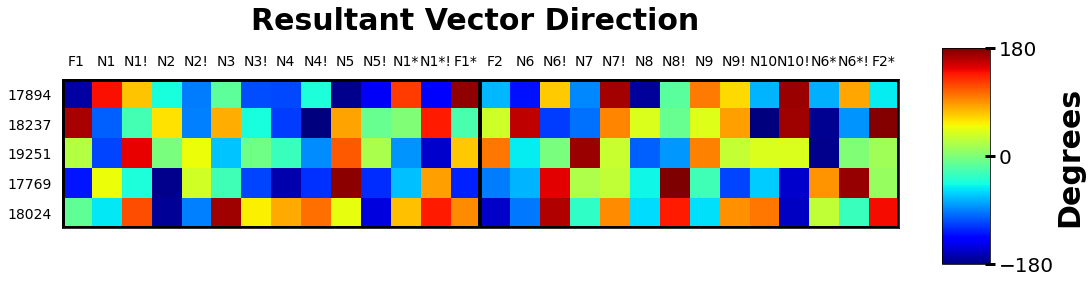

In [31]:
#b) Resultant Vector Direction 

res_vec_deg = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == '92wn':    #For this animal the behavioral data in this room is messed up (missing)
            res_vec_deg[animal][room] = np.nan
            
        else:    
            res_vec_deg[animal][room] = behavior_of_animals[animal][room][2]
                   
plot = np.ndarray(shape =(len(res_vec_deg.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot[y, x] = res_vec_deg[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='jet', vmin=-180, vmax=180)
plt.title('Resultant Vector Direction '  ,size=30, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(res_vec_deg[an].keys())))
ax.set_yticks(np.arange(len(res_vec_deg.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(res_vec_deg[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  

cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [-180,0,180]).set_label('Degrees',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20) 

#sum_x
#sum_y

#sum_absolute_x
#sum_absolute_y

#length = sqrt(sumx**2 +sumy**2)/sqrt(sum_abs_x**2+sum_abs_y**2)
#plot length for each animal in each room 
#Circstat function get p-value as to whether it comes from a uniform distribution 


<Figure size 432x288 with 0 Axes>

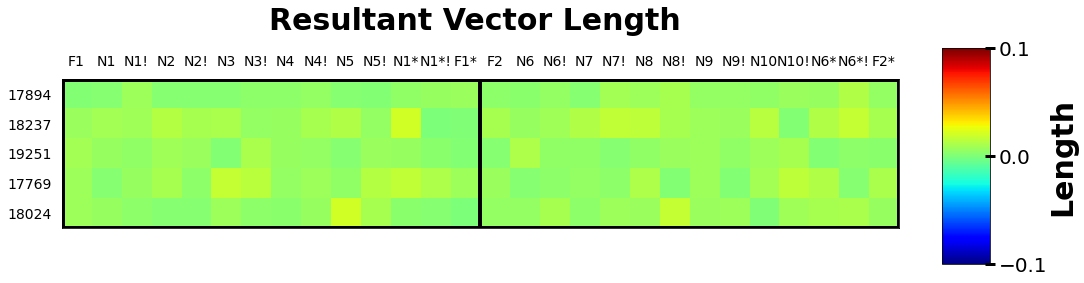

In [32]:
#c) Resultant Vector Length 

res_vec_len = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == '92wn':    #For this animal the behavioral data in this room is messed up (missing)
            res_vec_len[animal][room] = np.nan
            
        else:    
            res_vec_len[animal][room] = behavior_of_animals[animal][room][3]
                   
plot_l = np.ndarray(shape =(len(res_vec_len.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot_l[y, x] = res_vec_len[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot_l, cmap='jet', vmin=-0.1, vmax=0.1)
plt.title('Resultant Vector Length '  ,size=30, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(res_vec_len[an].keys())))
ax.set_yticks(np.arange(len(res_vec_len.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(res_vec_deg[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  

cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [-0.1,0,0.1]).set_label('Length',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20) 



<Figure size 432x288 with 0 Axes>

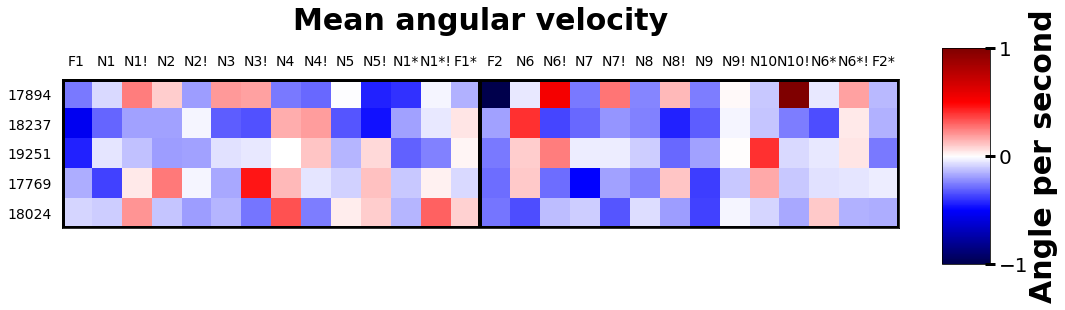

In [33]:
#d) Angular velocity 
ang_vel = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == 'N4':    #For this animal the behavioral data in this room is messed up (missing)
            ang_vel[animal][room] = np.nan
            
        else:    
            ang_vel[animal][room] = behavior_of_animals[animal][room][5]
                   
plot1 = np.ndarray(shape =(len(ang_vel.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot1[y, x] = ang_vel[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot1, cmap='seismic', vmin=-1, vmax=1)
plt.title('Mean angular velocity'  ,size=30, fontweight='bold', pad =25)

ax.set_xticks(np.arange(len(ang_vel[an].keys())))
ax.set_yticks(np.arange(len(ang_vel.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(ang_vel[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4) 


cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [-1,0,1]).set_label('Angle per second',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20) 

<Figure size 432x288 with 0 Axes>

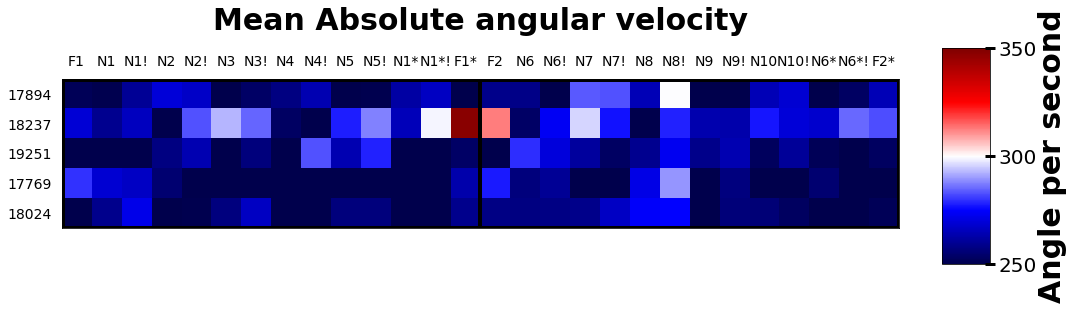

In [34]:
#e) Angular velocity 
mean_abs_ang_vel = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == '789':    #For this animal the behavioral data in this room is messed up (missing)
            mean_abs_ang_vel[animal][room] = np.nan
            
        else:    
            mean_abs_ang_vel[animal][room] = behavior_of_animals[animal][room][6]
                   
plot1 = np.ndarray(shape =(len(mean_abs_ang_vel.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot1[y, x] = mean_abs_ang_vel[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot1, cmap='seismic', vmin=250, vmax=350)
plt.title('Mean Absolute angular velocity'  ,size=30, fontweight='bold', pad =25)

ax.set_xticks(np.arange(len(mean_abs_ang_vel[an].keys())))
ax.set_yticks(np.arange(len(mean_abs_ang_vel.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(mean_abs_ang_vel[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4) 


cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [250,300,350]).set_label('Angle per second',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20) 

<Figure size 432x288 with 0 Axes>

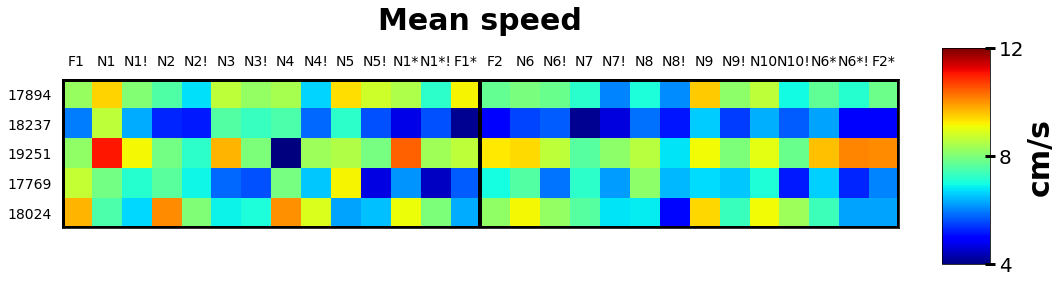

In [35]:
#f)Mean Speed 

sp = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == '43':    #For this animal the behavioral data in this room is messed up (missing)
            sp[animal][room] = np.nan
            
        else:    
            sp[animal][room] = behavior_of_animals[animal][room][8]
                   
plot2 = np.ndarray(shape =(len(sp.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot2[y, x] = sp[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot2, cmap='jet', vmin=4, vmax=12)
plt.title('Mean speed'  ,size=30, fontweight='bold', pad =25)

ax.set_xticks(np.arange(len(sp[an].keys())))
ax.set_yticks(np.arange(len(sp.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(sp[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [4,8,12]).set_label('cm/s',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20)   

<Figure size 432x288 with 0 Axes>

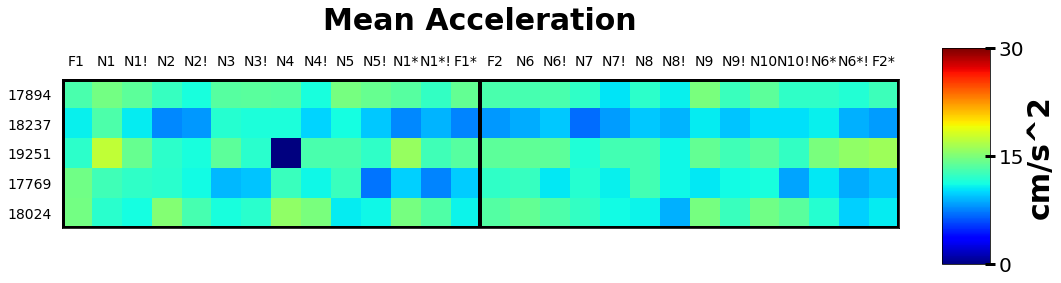

In [36]:
#g) Mean acceleration 

acc = {'17894':{}, '18237':{}, '19251':{}, '17769':{}, '18024':{}}

for animal in animal_list: 
    for room in all_rooms:
        if animal == '19251' and room == '9809':    #For this animal the behavioral data in this room is messed up (missing)
            acc[animal][room] = np.nan
            
        else:    
            acc[animal][room] = behavior_of_animals[animal][room][11]
                   
plot3 = np.ndarray(shape =(len(acc.keys()),len(all_rooms)))

y=-1
x=0
for an in animal_list:
    y=y+1
    x=0
    for rm in all_rooms:
        plot3[y, x] = acc[an][rm]
        x=x+1                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot3, cmap='jet', vmin=0, vmax=30)
plt.title('Mean Acceleration'  ,size=30, fontweight='bold', pad =25)

ax.set_xticks(np.arange(len(acc[an].keys())))
ax.set_yticks(np.arange(len(acc.keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(acc[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(animal_list,  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=4.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.45, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.45, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.94, 0.4, 0.045, 0.2])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,15,30]).set_label('cm/s^2',size=30, color = 'black',
                                                                                     labelpad=1, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20)   

In [37]:
#h) t-tests for  Speed, Angular Speed, Acceleration 
mean_speeds_n =        {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]}    #mean speeds novel rooms 
mean_speeds_f  =       {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]}    #mean speeds fam rooms 
pval_tt_mean_speeds  = {}                                                              #pval ttest mean_speed_novel vs. mean_speed_fam

mean_ang_speed_n =     {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]} #mean angular speeds novel rooms 
mean_ang_speed_f  =    {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]} #mean angular speeds fam rooms 
pval_tt_ang_speed  =   {}                                                           #pval ttest mean_ang_speed_novel vs. meanang_speed_familiar

mean_accel_n =     {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]} #mean angular speeds novel rooms 
mean_accel_f  =    {'17894':[], '18237':[], '19251':[], '17769':[], '18024':[]} #mean angular speeds fam rooms 
pval_tt_accel  =   {}                                                           #pval ttest mean_ang_speed_novel vs. meanang_speed_familiar

for animal in animal_list: 
    for room in novel_rooms:
        mean_speeds_n[animal].append(behavior_of_animals[animal][room][8])
        mean_ang_speed_n[animal].append(behavior_of_animals[animal][room][6])
        mean_accel_n[animal].append(behavior_of_animals[animal][room][11])
    
    for rm in familiar_rooms:   
        mean_speeds_f[animal].append(behavior_of_animals[animal][rm][8])
        mean_ang_speed_f[animal].append(behavior_of_animals[animal][rm][6])
        mean_accel_f[animal].append(behavior_of_animals[animal][rm][11])
   
for a in animal_list: 
    pval_tt_mean_speeds[a] = stats.ttest_ind(mean_speeds_n[a], mean_speeds_f[a], axis=0, equal_var=True, nan_policy='omit')[1] #Do the t test 
    pval_tt_ang_speed[a] =   stats.ttest_ind(mean_ang_speed_n[a], mean_ang_speed_f[a], axis=0, equal_var=True, nan_policy='omit')[1] #Do the t test
    pval_tt_accel[a] = stats.ttest_ind(mean_accel_n[a], mean_accel_f[a], axis=0, equal_var=True, nan_policy='omit')[1] #Do the t test 

In [38]:
print(pval_tt_mean_speeds)
print(pval_tt_ang_speed)
print(pval_tt_accel)

{'17894': 0.40876107998016753, '18237': 0.09596316775684591, '19251': 0.4919277814989266, '17769': 0.7185852716833293, '18024': 0.8472920614317929}
{'17894': 0.635960084708846, '18237': 0.005180681344739144, '19251': 0.9388329869624267, '17769': 0.10305340388981024, '18024': 0.8847678660903503}
{'17894': 0.5520327049789634, '18237': 0.19678694329727833, '19251': 0.5187630118167954, '17769': 0.4451453194493288, '18024': 0.820436893798077}


# DIFFERENCES VERSION 

what animal do you want to plot?17894


<Figure size 432x288 with 0 Axes>

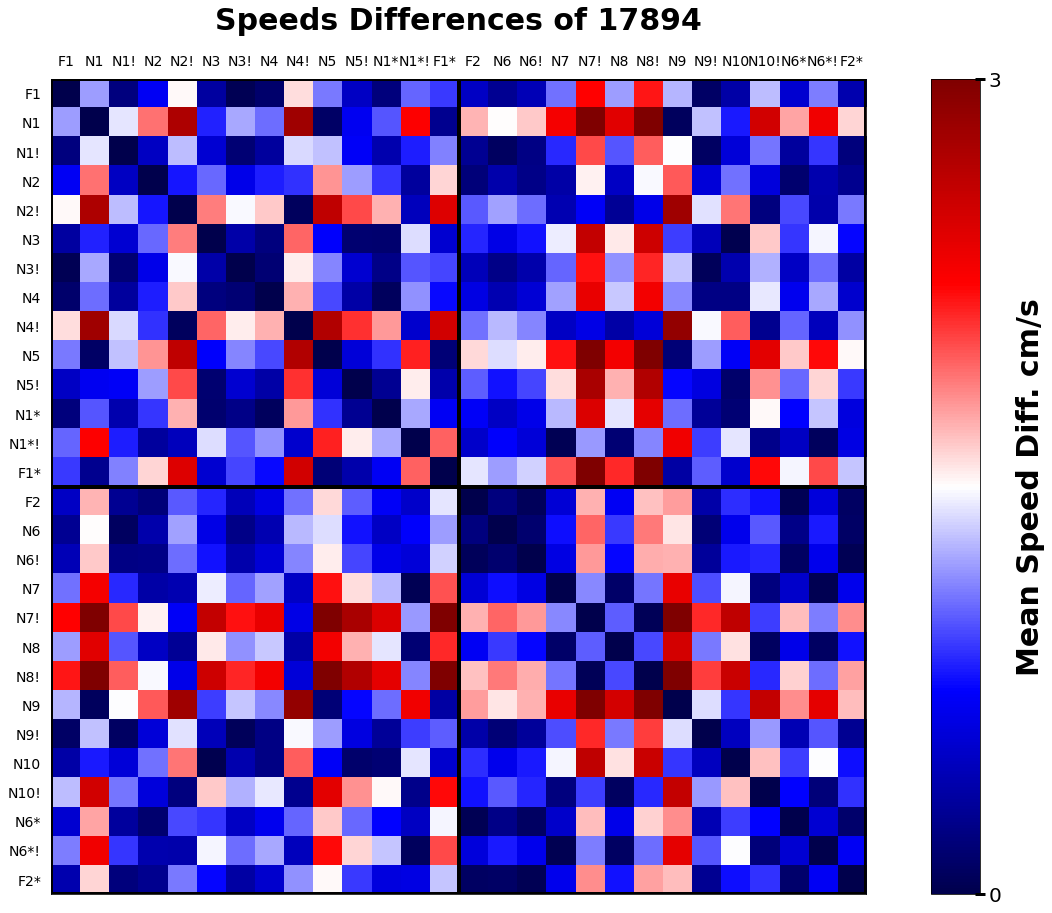

In [39]:
#A) Mean Speed differences 

#sp = a dictionary that holds the mean speed of each animal and session 

an = str(input("what animal do you want to plot?"))          
plot = np.ndarray(shape = (len(sp[an].keys()),len(sp[an].keys())))


y=-1
x=0
for u in sp[an].keys():
    y=y+1
    x=0
    for v in sp[an].keys():
        plot[y, x] = np.abs(sp[an][u]-sp[an][v])
        x=x+1
                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='seismic', vmin=0, vmax=3)
plt.title('Speeds Differences of ' + an ,size=30, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(sp[an].keys())))
ax.set_yticks(np.arange(len(sp[an].keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(sp[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(sp[an].keys(),  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.95, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,3]).set_label('Mean Speed Diff. cm/s',size=30, color = 'black',
                                                                                     labelpad=15, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20)   

#pickle_out = open('speed_diff_final_' + an, 'wb')       
#pickle.dump(plot, pickle_out)
#pickle_out.close()

#plt.savefig('speed_diff_' + an, dpi=800, bbox_inches='tight')

what animal do you want to plot?17894


<Figure size 432x288 with 0 Axes>

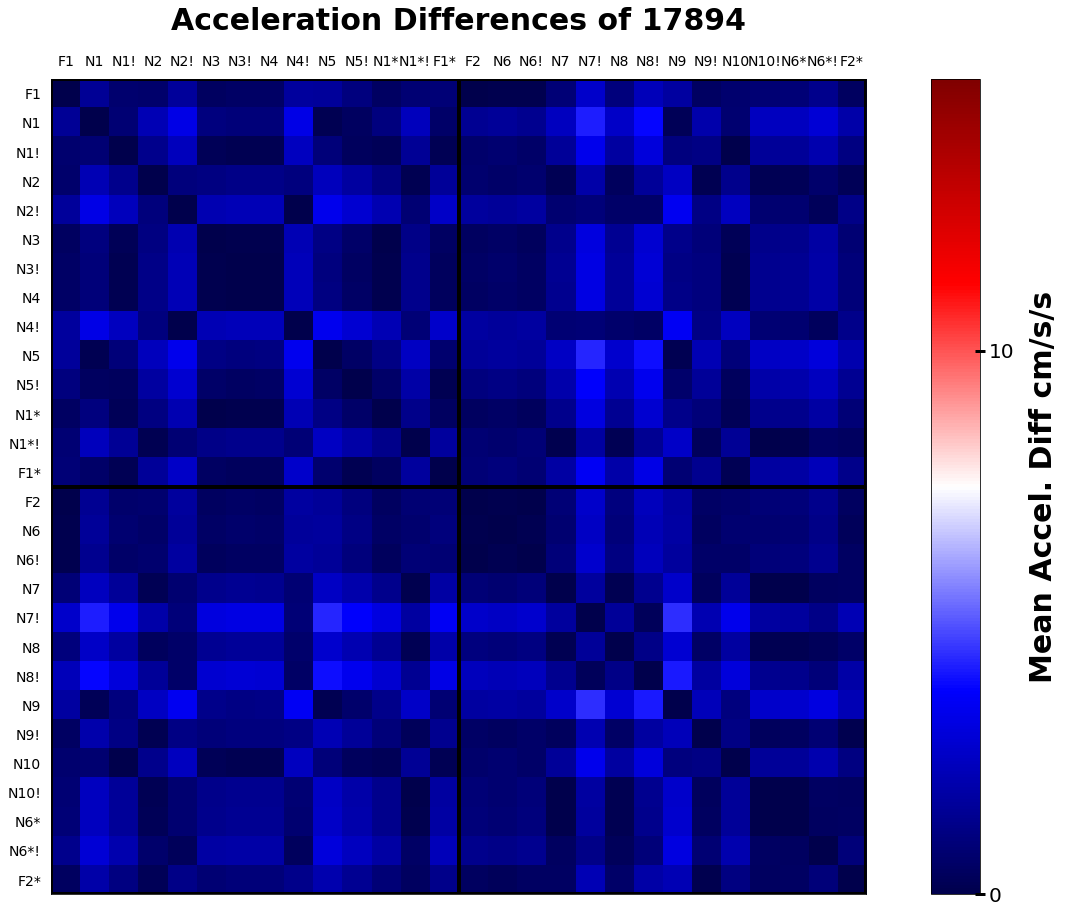

In [40]:
#B) Mean Acceleration differences 

#acc = a dictionary that holds the mean speed of each animal and session 

an = str(input("what animal do you want to plot?"))          
plot = np.ndarray(shape = (len(acc[an].keys()),len(acc[an].keys())))


y=-1
x=0
for u in acc[an].keys():
    y=y+1
    x=0
    for v in acc[an].keys():
        plot[y, x] = np.abs(acc[an][u]-acc[an][v])
        x=x+1
                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='seismic', vmin=0, vmax=15)
plt.title('Acceleration Differences of ' + an ,size=30, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(acc[an].keys())))
ax.set_yticks(np.arange(len(acc[an].keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(acc[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(acc[an].keys(),  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.95, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,10]).set_label('Mean Accel. Diff cm/s/s',size=30, color = 'black',
                                                                                     labelpad=15, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20)

#pickle_out = open('accel_diff_final_' + an, 'wb')       
#pickle.dump(plot, pickle_out)
#pickle_out.close()

#plt.savefig('accel_diff_' + an, dpi=800, bbox_inches='tight')

what animal do you want to plot?17894


<Figure size 432x288 with 0 Axes>

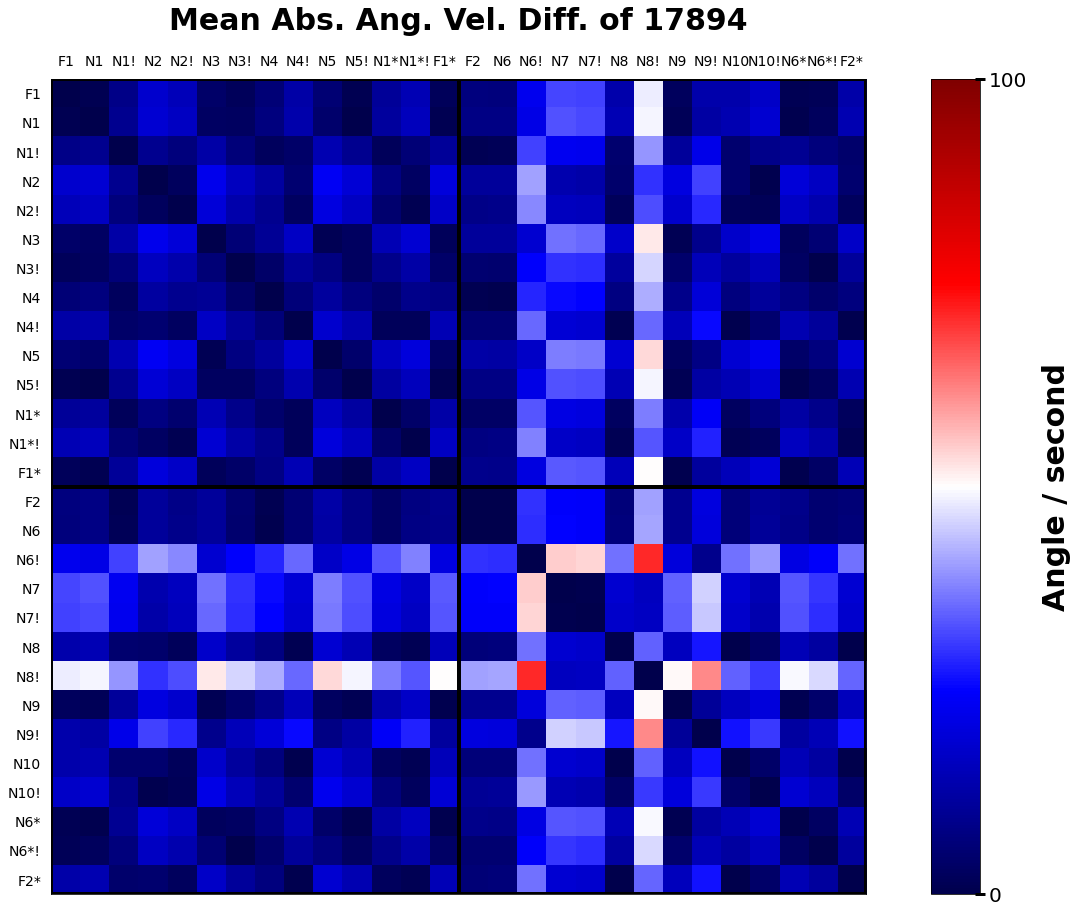

In [41]:
#C) Mean Absolute angular velocity differences 

#mean_abs_ang_vel= a dictionary that holds the mean speed of each animal and session 

an = str(input("what animal do you want to plot?"))          
plot = np.ndarray(shape = (int(len(mean_abs_ang_vel[an].keys())),int(len(mean_abs_ang_vel[an].keys()))))


y=-1
x=0
for u in mean_abs_ang_vel[an].keys():
    y=y+1
    x=0
    for v in mean_abs_ang_vel[an].keys():
        plot[y, x] = np.abs(mean_abs_ang_vel[an][u]-mean_abs_ang_vel[an][v])
        x=x+1
                
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='seismic', vmin=0, vmax=100)
plt.title('Mean Abs. Ang. Vel. Diff. of ' + an ,size=30, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
ax.set_xticks(np.arange(len(mean_abs_ang_vel[an].keys())))
ax.set_yticks(np.arange(len(mean_abs_ang_vel[an].keys())))
ax.xaxis.tick_top()
ax.set_xticklabels(mean_abs_ang_vel[an].keys(), fontsize = 14, color = 'black')
ax.set_yticklabels(mean_abs_ang_vel[an].keys(),  fontsize = 14, color = 'black')
ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.95, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,100]).set_label('Angle / second',size=30, color = 'black',
                                                                                     labelpad=15, fontweight="bold")
plt.tick_params(axis = 'y', length = 10, width= 3, direction='inout', labelsize=20) 

#pickle_out = open('mean_abs_ang_vel_diff_final_' + an, 'wb')       
#pickle.dump(plot, pickle_out)
#pickle_out.close()

#plt.savefig('mean_abs_ang_vel_diff_' + an, dpi=800, bbox_inches='tight')

In [42]:
animal_list = ['17894', '18237', '19251', '17769','18024']    #animals 
abs_ang_vel_diff_files = {}                                    #Mean absolute angular velocity differences of each an
speed_diff_files = {}
accel_diff_files = {} 

for an in animal_list:
    infile = open('mean_abs_ang_vel_diff_final_' + an,'rb')          #import the correct Mean absolute angular velocity differences data 
    abs_ang_vel_diff_files[an] = pickle.load(infile)
    infile.close()

for an in animal_list:
    infile = open('speed_diff_final_' + an,'rb')                     #import the correct speed differences data 
    speed_diff_files[an] = pickle.load(infile)
    infile.close()

for an in animal_list:
    infile = open('accel_diff_final_' + an,'rb')                     #import the correct Accel differences data 
    accel_diff_files[an] = pickle.load(infile)
    infile.close()

comp_within = {'N1': ['N1!'],
               'N2': ['N2!'],
               'N3': ['N3!'], 
               'N4': ['N4!'],
               'N5': ['N5!'],
               'N6': ['N6!'],
               'N7': ['N7!'],  
               'N8': ['N8!'], 
               'N9': ['N9!'],
              'N10': ['N10!']}

comp_between = {'N1':  ['N1*', 'N1*!'],
                'N1!': ['N1*', 'N1*!'],
                'N6':  ['N6*', 'N6*!'],
                'N6!': ['N6*', 'N6*!']}

comp_f = {'F1':  ['F1*', 'F2', 'F2*'],
          'F1*': ['F2', 'F2*'],
          'F2':  ['F2*']}


control_within = ['N1', 'N1!','N2', 'N2!','N3', 'N3!','N4', 'N4!','N5', 'N5!',
                  'N6', 'N6!','N7', 'N7!','N8', 'N8!','N9', 'N9!','N10', 'N10!']
control_between = ['N1','N1!','N1*','N1*!','N6','N6!','N6*','N6*!']
control_f = ['F1', 'F1*','F2', 'F2*']



                
       
    
within_session_speed_mean  = {}     #within session speed mean
between_session_speed_mean = {}     #between session ...
f_speed_mean               = {}     #familiar room ... 

within_session_acc_mean    = {}     #within sesssion acceleration mean
between_session_acc_mean   = {}     #between session ...
f_acc_mean                 = {}     #familiar room ... 

within_session_abs_ang_vel_mean   = {}      #within sesssion absolute angular velocity mean 
between_session_abs_ang_vel_mean   = {}     #between session ...
f_abs_ang_vel_mean                 = {}     #familiar room ... 

    
    
    
    
    
    
within_session_speed_diff  = {}     #within session speed differences 
between_session_speed_diff = {}     #between session ...
f_speed_diff               = {}     #familiar room ... 

within_session_acc_diff    = {}     #within sesssion acceleration differences 
between_session_acc_diff   = {}     #between session ...
f_acc_diff                 = {}     #familiar room ... 

within_session_abs_ang_vel_diff    = {}     #within sesssion absolute angular velocity differences 
between_session_abs_ang_vel_diff   = {}     #between session ...
f_abs_ang_vel_diff                 = {}     #familiar room ... 
    
for animal in animal_list: 
    within_session_speed_diff[animal]  = np.nanmean(get_diff(comp_within,  speed_diff_files[animal]))
    between_session_speed_diff[animal] = np.nanmean(get_diff(comp_between, speed_diff_files[animal]))
    f_speed_diff[animal]               = np.nanmean(get_diff(comp_f,       speed_diff_files[animal]))
    
    within_session_acc_diff[animal]    = np.nanmean(get_diff(comp_within,  accel_diff_files[animal]))
    between_session_acc_diff[animal]   = np.nanmean(get_diff(comp_between, accel_diff_files[animal]))
    f_acc_diff[animal]                 = np.nanmean(get_diff(comp_f,       accel_diff_files[animal]))
    
    within_session_abs_ang_vel_diff[animal]  = np.nanmean(get_diff(comp_within,  abs_ang_vel_diff_files[animal]))
    between_session_abs_ang_vel_diff[animal] = np.nanmean(get_diff(comp_between, abs_ang_vel_diff_files[animal]))
    f_abs_ang_vel_diff[animal]               = np.nanmean(get_diff(comp_f,       abs_ang_vel_diff_files[animal]))
    
    
    
for animal in animal_list: 
    within_session_speed_mean[animal]  = get_value(animal, control_within,   sp[animal])
    between_session_speed_mean[animal] = get_value(animal, control_between,  sp[animal])
    f_speed_mean[animal]               = get_value(animal, control_f,        sp[animal])
    
    within_session_acc_mean[animal]  = get_value(animal, control_within,   acc[animal])
    between_session_acc_mean[animal] = get_value(animal, control_between,  acc[animal])
    f_acc_mean[animal]               = get_value(animal, control_f,        acc[animal])
    
    within_session_abs_ang_vel_mean[animal]  = get_value(animal, control_within,   mean_abs_ang_vel[animal])
    between_session_abs_ang_vel_mean[animal] = get_value(animal, control_between,  mean_abs_ang_vel[animal])
    f_abs_ang_vel_mean[animal]               = get_value(animal, control_f,        mean_abs_ang_vel[animal]) 

In [43]:
between_session_speed_diff

{'17894': 0.7946093975411028,
 '18237': 1.4872090592683436,
 '19251': 1.1082044426180433,
 '17769': 1.6874069163689516,
 '18024': 1.6452732672997086}

# Part 10: GLMs with controlling for behavior

- here we actually reconstruct the GLMs and perform the controls

In [44]:
within_session_speed_diff

{'17894': 1.0305463254228093,
 '18237': 0.9194779717120148,
 '19251': 1.8603172910293544,
 '17769': 1.3953485991196106,
 '18024': 1.0934627760516948}

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.971     
Dependent Variable: y                AIC:                -21.8521  
Date:               2021-12-09 15:05 BIC:                -23.0238  
No. Observations:   5                Log-Likelihood:     13.926    
Df Model:           2                F-statistic:        68.85     
Df Residuals:       2                Prob (F-statistic): 0.0143    
R-squared:          0.986            Scale:              0.00055752
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.0466     0.1463   -0.3183   0.7804   -0.6761   0.5829
neural        1.2230     0.2415    5.0638   0.0369    0.1838   2.2621
behav        -0.1161     0.0517   -2.2445   0.1539   -0.3386   0.1064
------------------------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


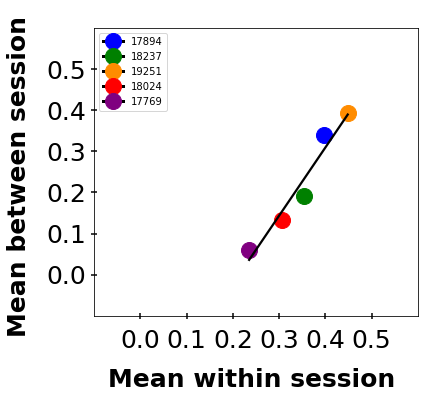

In [62]:
#A) Controlling for Speed difference

fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')


ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])


d = {'neural': list(within_session.values()), 'behav': list(between_session_speed_diff.values())} #Speed diff
X = pd.DataFrame(data = d)
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.949     
Dependent Variable: y                AIC:                -18.9672  
Date:               2021-12-09 15:05 BIC:                -20.1389  
No. Observations:   5                Log-Likelihood:     12.484    
Df Model:           2                F-statistic:        38.23     
Df Residuals:       2                Prob (F-statistic): 0.0255    
R-squared:          0.975            Scale:              0.00099275
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.1154     0.1841   -0.6269   0.5947   -0.9073   0.6765
neural        1.3203     0.3089    4.2746   0.0506   -0.0087   2.6492
behav        -0.0560     0.0401   -1.3973   0.2972   -0.2284   0.1164
------------------------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


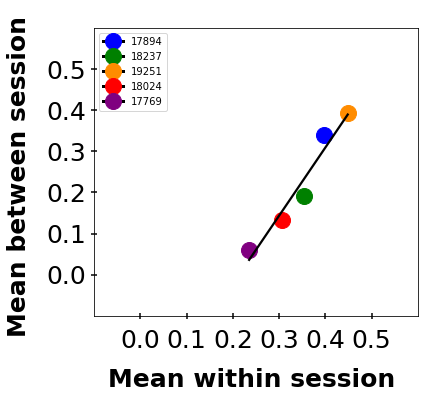

In [61]:
#B) Controlling for accel difference

fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
 

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])


d1 = {'neural': list(within_session.values()), 'behav': list(between_session_acc_diff.values())} #Accel diff
X1 = pd.DataFrame(data = d1)
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.906    
Dependent Variable: y                AIC:                -15.8833 
Date:               2021-12-09 15:04 BIC:                -17.0550 
No. Observations:   5                Log-Likelihood:     10.942   
Df Model:           2                F-statistic:        20.17    
Df Residuals:       2                Prob (F-statistic): 0.0472   
R-squared:          0.953            Scale:              0.0018395
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.4170     0.1958   -2.1295   0.1670   -1.2596   0.4256
neural       1.7612     0.3850    4.5745   0.0446    0.1047   3.4178
behav        0.0013     0.0035    0.3647   0.7503   -0.0137   0.0163
------------------------------------------------------------------
O

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


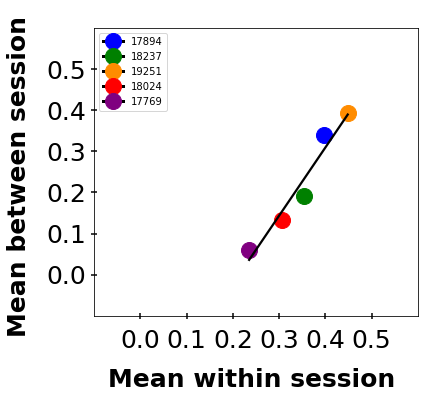

In [60]:
#C) Controlling for absolute angular velocity difference 

fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])



d1 = {'neural': list(within_session.values()), 'behav': list(between_session_abs_ang_vel_diff.values())} #absolute angular vel diff
X1 = pd.DataFrame(data = d1)
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.917    
Dependent Variable: y                AIC:                -16.5490 
Date:               2021-12-09 15:03 BIC:                -17.7207 
No. Observations:   5                Log-Likelihood:     11.274   
Df Model:           2                F-statistic:        23.19    
Df Residuals:       2                Prob (F-statistic): 0.0413   
R-squared:          0.959            Scale:              0.0016102
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.3967     0.1082   -3.6650   0.0670   -0.8624   0.0690
neural       1.4911     0.3518    4.2388   0.0514   -0.0225   3.0047
behav        0.0133     0.0201    0.6609   0.5766   -0.0734   0.1000
------------------------------------------------------------------
O

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


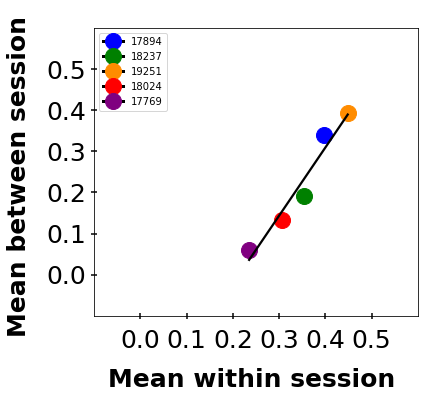

In [57]:
#D) Controlling for mean speed 
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])


d = {'neural': list(within_session.values()), 'behav': list(between_session_speed_mean.values())} #Mean speed
X = pd.DataFrame(data = d) 
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.925    
Dependent Variable: y                AIC:                -17.0323 
Date:               2021-12-09 15:04 BIC:                -18.2040 
No. Observations:   5                Log-Likelihood:     11.516   
Df Model:           2                F-statistic:        25.64    
Df Residuals:       2                Prob (F-statistic): 0.0375   
R-squared:          0.962            Scale:              0.0014619
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.4242     0.1185   -3.5788   0.0700   -0.9342   0.0858
neural       1.4700     0.3257    4.5133   0.0458    0.0686   2.8715
behav        0.0111     0.0134    0.8271   0.4952   -0.0466   0.0687
------------------------------------------------------------------
O

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


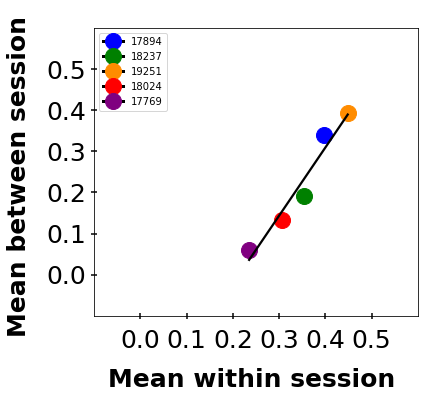

In [58]:
#E) Controlling for mean acceleration 

fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
 

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')



ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)

ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])

 
d1 = {'neural': list(within_session.values()), 'behav': list(between_session_acc_mean.values())} #mean accel
X1 = pd.DataFrame(data = d1)
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

In [51]:
print(within_session)
print(between_session_abs_ang_vel_mean)

{'17894': 0.3968802257306214, '18237': 0.3537043296726977, '19251': 0.4482902291894059, '17769': 0.2352646150470729, '18024': 0.30663294009299513}
{'17894': 253.8303672033389, '18237': 271.3990460463287, '19251': 242.97349102472444, '17769': 245.16967427491778, '18024': 251.84417230833867}


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.942    
Dependent Variable: y                AIC:                -18.3057 
Date:               2021-12-09 15:04 BIC:                -19.4774 
No. Observations:   5                Log-Likelihood:     12.153   
Df Model:           2                F-statistic:        33.37    
Df Residuals:       2                Prob (F-statistic): 0.0291   
R-squared:          0.971            Scale:              0.0011332
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.1039     0.3857    0.2693   0.8130   -1.5557   1.7634
neural       1.6629     0.2053    8.1008   0.0149    0.7797   2.5462
behav       -0.0018     0.0015   -1.2094   0.3501   -0.0083   0.0046
------------------------------------------------------------------
O

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


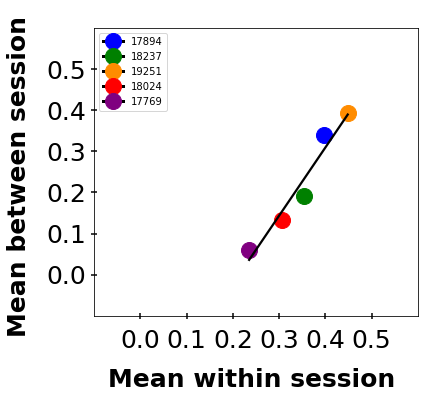

In [59]:
#F) Controlling for absolute angular velocity mean

fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session['17894'], between_session['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session['18237'], between_session['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session['19251'], between_session['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session['18024'], between_session['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session['17769'], between_session['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')


ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)

ax.legend(loc='upper left')

plt.xlim(-0.10,0.6)
plt.ylim(-0.10,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])



d1 = {'neural': list(within_session.values()), 'behav': list(between_session_abs_ang_vel_mean.values())} #Mean abs ang vel
X1 = pd.DataFrame(data = d1)
x1 = np.array(list(within_session.values())).reshape((-1, 1))
y1 = np.array(list(between_session.values()))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(X1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
sns.regplot(x1,y1,  ci=None, color= 'black')

# END